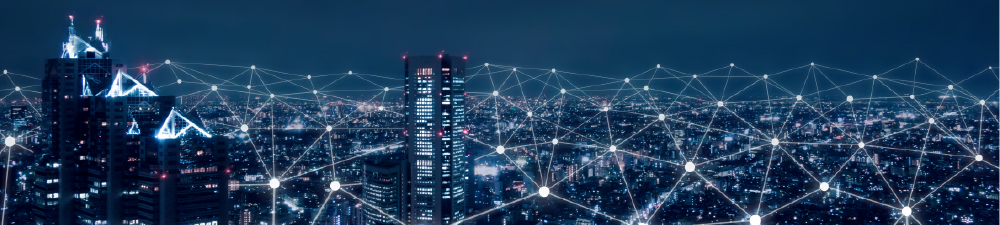

# Mini Project 3  - IU 4.6 Machine Learning
# By: BDA03 Group 5

# Major SEA Telecom Provider
Providing telecom services to prepais and postpaid customer segments combined with variety of product offers and plans.

## Business Problem
Company's post paid business of voice only plans is struggling to maintain its strong foothold in local market because of
- High churn rate amongst customers leading to a revenue decline of -500l USD every month
- Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share

## Project Objectives
### Business Objective:
Reduce monthly customer churn by identifying high rick customers well ub advance.
#### Hypothesis:
- Company CEO believes that existing models can predict churners precisely, but it's too late to take any retension actions, as customers usage have significantly declined by then

### Analytics Objectives:
1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers

## What is provided?
Data provided for 50k customers who are currently availing voice only postpaid plans from the telecom provider
#### Customer profile
- Months in service, Unique subscribers, Active subs, Service area, handset, model, Age HH1, Age HH2, Marital status, Occupation, Home ownership, Has Credit card, Owns motorcycle, Credit rating and changes over time, etc.
#### Customer Revenue
- Monthly revenue, recurring revenue from prior month, Percentage change in revenue
#### Customer Usage and Activity
- Monthly minutes, percent change in minutes, Overage minutes, Inbound & outbound calls, Peak & off-peak calls, dropped/blocked/unanswered calls, roaming calls, etc
#### Customer Interaction
- Customer care calls, Responds to mail offers, Retention calls, Retention offer accepted, referrals made, etc.
#### Churn
- Churn/ Non-churn flag for each customer

## Data Dictionary
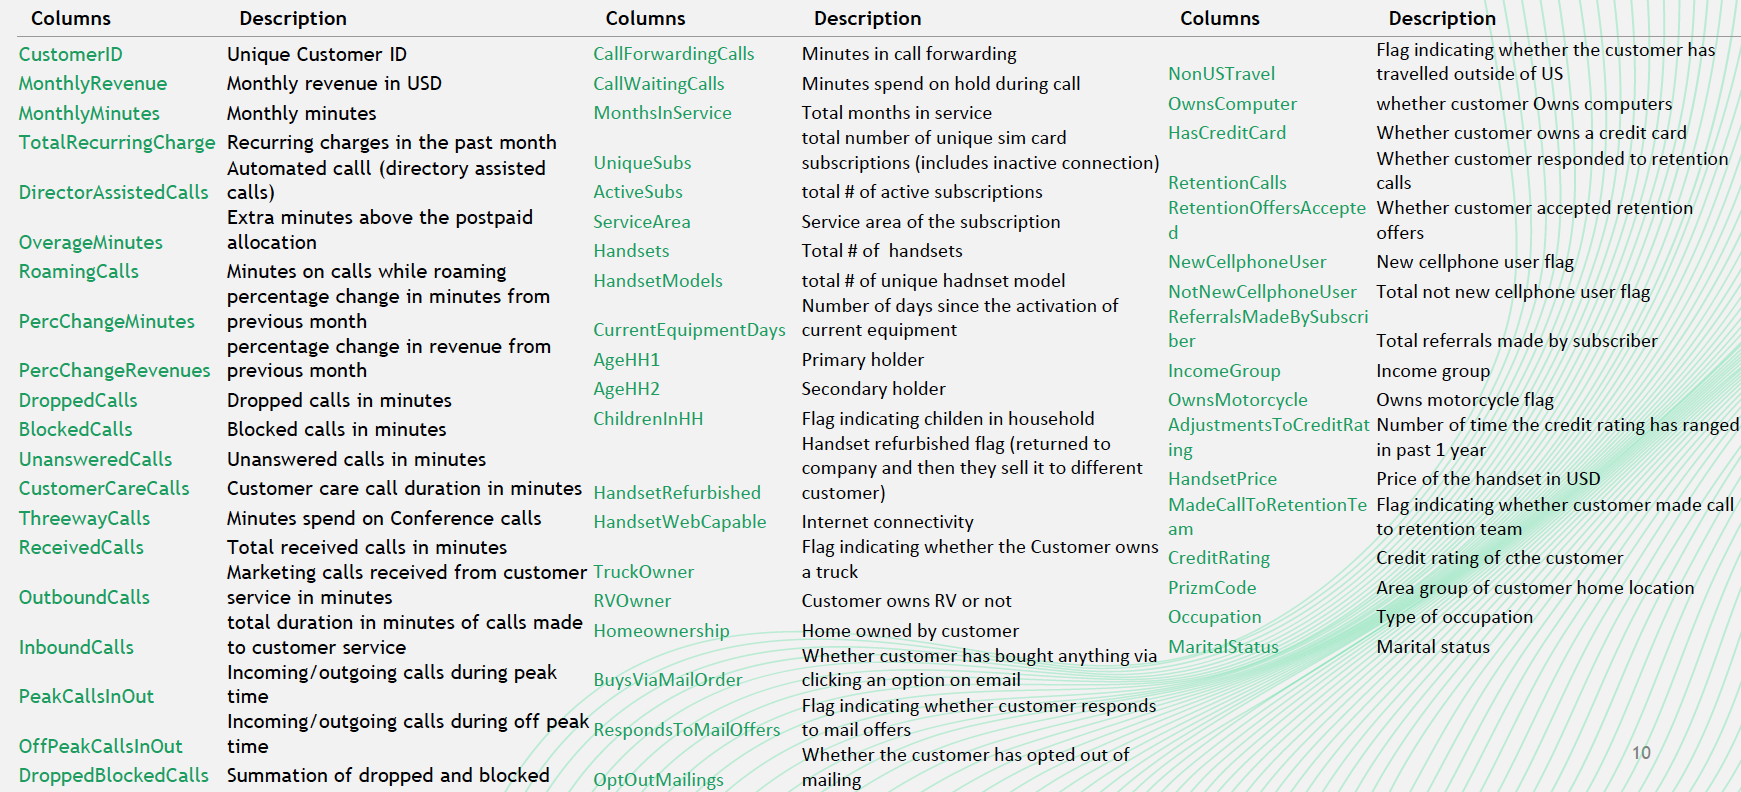
<br>
<br>
## Exercise:
1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.) [30 – 45 mins] [Marks: 10]
    - How many customers had zero monthly revenue?
    - How many columns have missing values percentage > 5%?
    - For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any
2. Perform exploratory analysis to analyze customer churn [30 – 45 mins] [Marks: 15]
    - Does customers with high overage minutes also have high revenue?
    - Does high number of active subscribers lead to low monthly revenue?
    - Does credit rating have an impact in churn rate?
3. Create additional features to help predict churn [20 – 40 mins] [Marks: 15]
    - Percent of current active subs over total subs
    - Percent of recurrent charge to monthly charge
    - Percent of overage minutes over total monthly minutes
4. Build classification model to predict customer churn [120 - 180 mins] [Marks: 50]
    - Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set
    - Build Random Forest classifier to compare model accuracy over the logistic regression model
    - Identify most important features impacting churn (Model evaluation metrics to be used: GINI, AUC, Precision and Recall)
5. Use the hold out data provided to predict churners using the best model identified in step 4 [45 -60 mins] [ Marks: 10]
6. Bonus Question: Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model [60 - 90 mins]

## Recap: 
### Customer Churn:
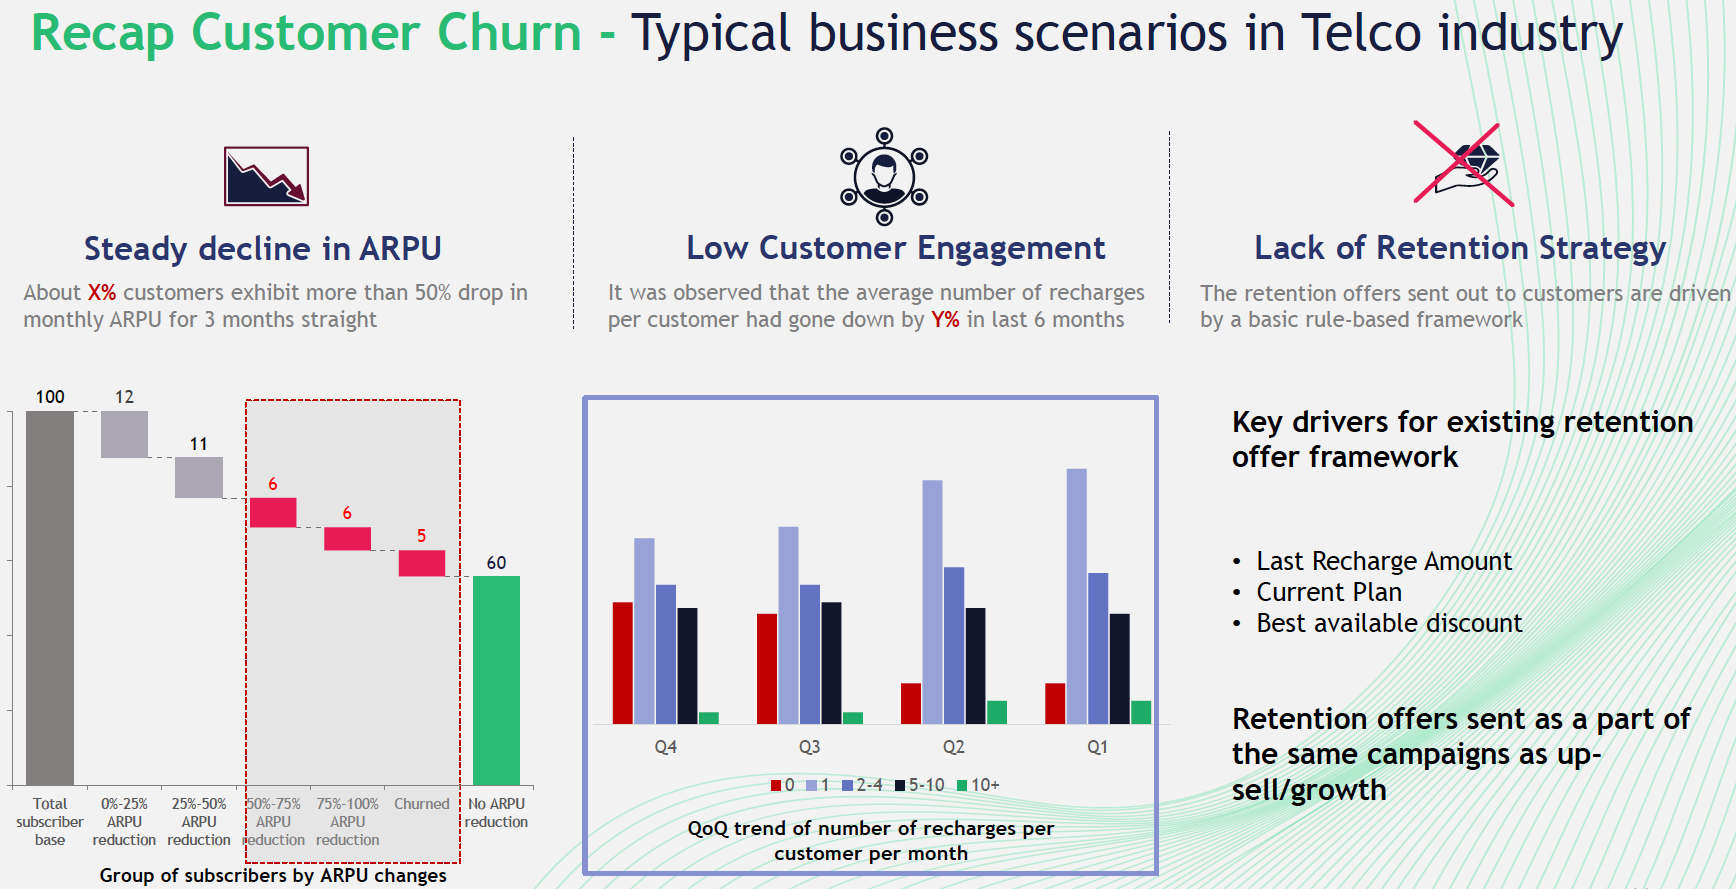

### Machine Learning Topics:
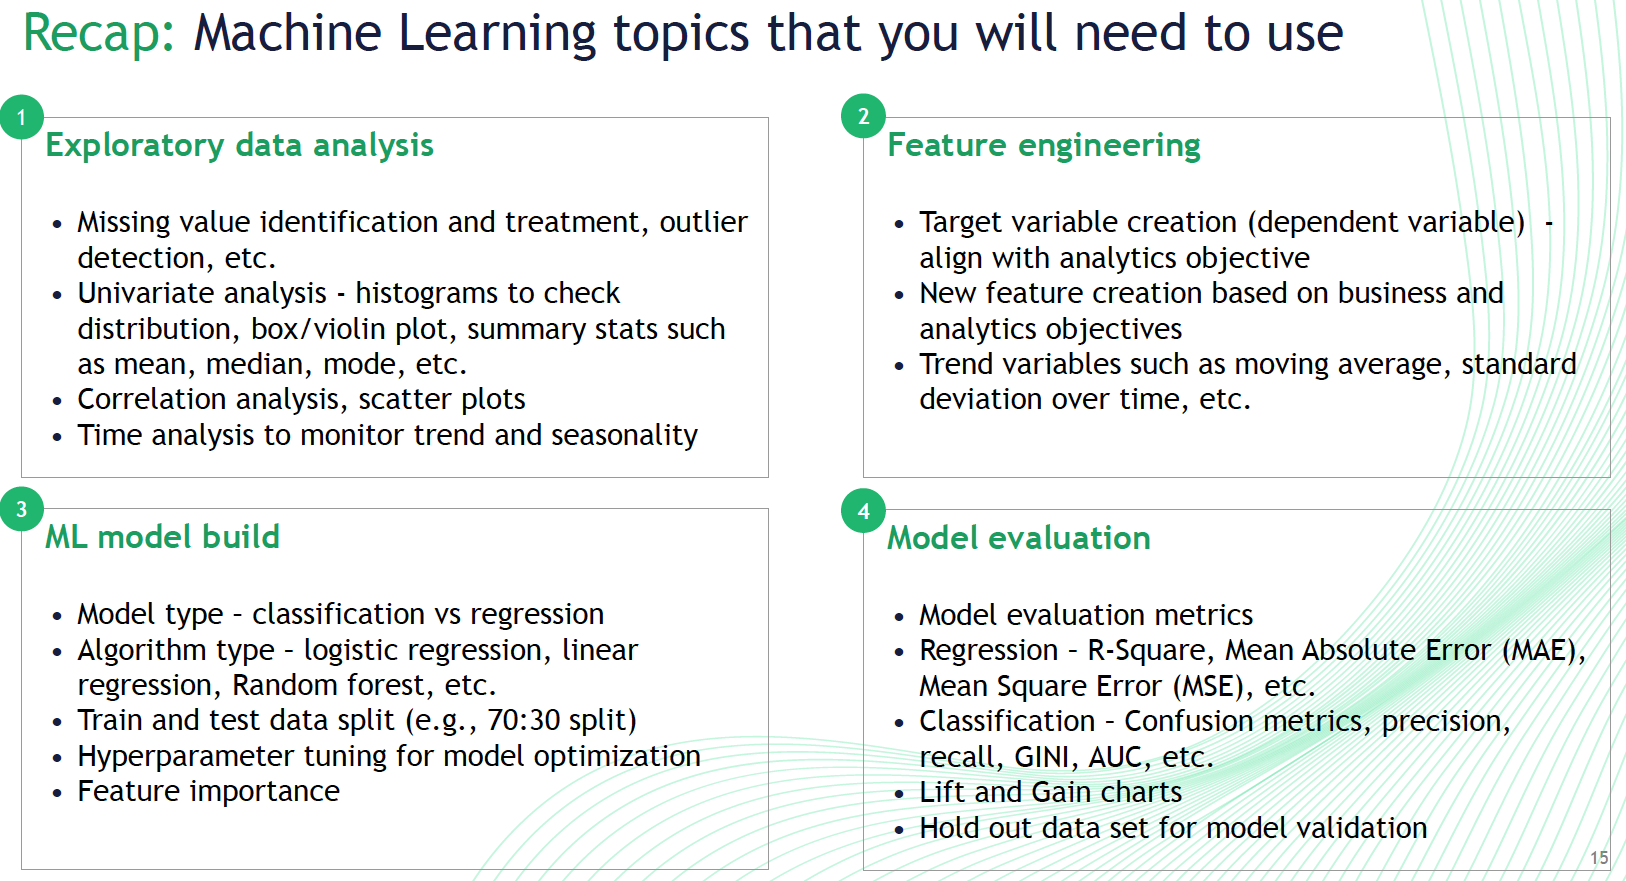

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as mtick

from scipy.stats import shapiro
import scipy.stats as stats

%matplotlib inline
sns.set_style("whitegrid")

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
#Read data using pandas
cust_df = pd.read_csv('Mini_project_3_Data.xls')


## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape


(51047, 58)

In [4]:
#Check data types of each column using "dtypes" function
print("Data types for the data set:")
cust_df.dtypes


#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
cust_df.head(5)

Data types for the data set:


CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

First 5 rows of the raw data:


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
# Checking if there are any duplicates
dupli = cust_df['CustomerID'].value_counts(ascending=False)
duplicate_users = dupli[dupli > 1].count()
print('There are',str(duplicate_users), 'duplicate users in the dataset.')

There are 0 duplicate users in the dataset.


In [6]:
# CustomerID is a identifier, drop it.
cust_df = cust_df.drop('CustomerID', axis = 1)



In [7]:
cust_df['Homeownership'].unique()

array(['Known', 'Unknown'], dtype=object)

In [8]:
cust_df['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [9]:
# Change CreditRating
cust_df['CreditRating'] = cust_df['CreditRating'].apply(lambda v : int(v.split('-')[0]) if v else np.nan)

In [10]:
#Determine Unique categories
def number_unique(df):
    for i in cust_df.transpose().index:
        print(pd.DataFrame({i: cust_df[i].unique()}))

In [11]:
#Data clean up
#Change 'Unknown' to NaN.
def unknown_to_nan(df):
    x = df.columns.tolist()
    x.remove('Homeownership')
    for i in x:
        for a in range(0,len(df)):
            if df[i][a] == 'Unknown':
                df[i] = df[i].replace({'Unknown': np.NaN})
            else:
                pass
    return df

In [12]:
unknown_to_nan(cust_df)

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30,Yes,1,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30,No,4,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,NaN,No,3,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10,No,4,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10,No,1,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,...,0,6,No,0,60,No,1,Suburban,Other,Yes
51043,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,...,0,9,No,1,60,No,3,Other,Other,No
51044,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,...,0,7,No,1,80,No,5,Other,Clerical,No
51045,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,9,No,0,30,No,5,Other,Other,No


In [13]:
# Change HandsetPrice to be an float
cust_df['HandsetPrice'] = cust_df['HandsetPrice'].astype(float)

In [14]:
num_cols  = []
cat_cols = []
def num_cat_col_identifier(df):
    for i in df.columns.tolist():
        if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
            num_cols.append(i)
        else:
            cat_cols.append(i)
    print('List of numerical columns:\n', num_cols)
    print('\n\nList of categorical columns:\n', cat_cols)    
    

In [15]:
num_cat_col_identifier(cust_df)

List of numerical columns:
 ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating']


List of categorical columns:
 ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNew

In [16]:
cust_df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MonthlyRevenue,50891.0,58.834492,44.507336,-6.17,33.61,48.46,71.065,1223.38
MonthlyMinutes,50891.0,525.653416,529.871063,0.00,158.00,366.00,723.000,7359.00
TotalRecurringCharge,50891.0,46.830088,23.848871,-11.00,30.00,45.00,60.000,400.00
DirectorAssistedCalls,50891.0,0.895229,2.228546,0.00,0.00,0.25,0.990,159.39
OverageMinutes,50891.0,40.027785,96.588076,0.00,0.00,3.00,41.000,4321.00
RoamingCalls,50891.0,1.236244,9.818294,0.00,0.00,0.00,0.300,1112.40
PercChangeMinutes,50680.0,-11.547908,257.514772,-3875.00,-83.00,-5.00,66.000,5192.00
PercChangeRevenues,50680.0,-1.191985,39.574915,-1107.70,-7.10,-0.30,1.600,2483.50
DroppedCalls,51047.0,6.011489,9.043955,0.00,0.70,3.00,7.700,221.70
BlockedCalls,51047.0,4.085672,10.946905,0.00,0.00,1.00,3.700,384.30


In [17]:
cust_df[cat_cols].describe().transpose()

,count,unique,top,freq
Churn,51047,2,No,36336
ServiceArea,51023,747,NYCBRO917,1684
ChildrenInHH,51047,2,No,38679
HandsetRefurbished,51047,2,No,43956
HandsetWebCapable,51047,2,Yes,46046
TruckOwner,51047,2,No,41524
RVOwner,51047,2,No,46894
Homeownership,51047,2,Known,33987
BuysViaMailOrder,51047,2,No,32596
RespondsToMailOffers,51047,2,No,31821


In [18]:
# Create function to check on columns with NaN (integer)
def check_nan_int(df):
    print('Columns with missing values:')
    count = 0
    for i in df.columns.tolist():
        if cust_df[i].isna().sum()>0:
            count = count +1
            print(i, ':', cust_df[i].isna().sum())
        else:
            pass
    print('\nNo of columns with missing values:', count)

In [19]:
# Create function to check on columns with NaN (percentage)
def check_nan_per(df):
    print('Percentage of missing values:')
    count = 0
    for i in df.columns.tolist():
        if df[i].isna().sum()>0:
            print(i, ':', str(round((df[i].isna().sum()/len(df))*100,4)) +'%')
            count = count +1
        else:
            pass
    print('\nNumber of columns with missing values:', count)


In [20]:
check_nan_int(cust_df)

Columns with missing values:
MonthlyRevenue : 156
MonthlyMinutes : 156
TotalRecurringCharge : 156
DirectorAssistedCalls : 156
OverageMinutes : 156
RoamingCalls : 156
PercChangeMinutes : 367
PercChangeRevenues : 367
ServiceArea : 24
Handsets : 1
HandsetModels : 1
CurrentEquipmentDays : 1
AgeHH1 : 909
AgeHH2 : 909
HandsetPrice : 28982
MaritalStatus : 19700

No of columns with missing values: 16


In [21]:
check_nan_per(cust_df)

Percentage of missing values:
MonthlyRevenue : 0.3056%
MonthlyMinutes : 0.3056%
TotalRecurringCharge : 0.3056%
DirectorAssistedCalls : 0.3056%
OverageMinutes : 0.3056%
RoamingCalls : 0.3056%
PercChangeMinutes : 0.7189%
PercChangeRevenues : 0.7189%
ServiceArea : 0.047%
Handsets : 0.002%
HandsetModels : 0.002%
CurrentEquipmentDays : 0.002%
AgeHH1 : 1.7807%
AgeHH2 : 1.7807%
HandsetPrice : 56.7751%
MaritalStatus : 38.5919%

Number of columns with missing values: 16


In [22]:
def missing_num_cat_col(df):
    missing_num = 0
    missing_cat = 0
    missing_num_list = []
    missing_cat_list = []
    for i in df.columns.tolist():
        if df[i].isna().sum()>0:
            if i in num_cols:
                missing_num = missing_num +1
                missing_num_list.append(i)
            else:
                missing_cat = missing_cat +1
                missing_cat_list.append(i)
        else:
            pass
    
    print('Number of numeric columns with missing values:', missing_num)
    print('List of numeris columns with missing values:\n', missing_num_list)
    print('\nNumber of categorical columns with missing values:', missing_cat)
    print('List of categorical columns with missing values:\n', missing_cat_list)

In [23]:
# count of each categorical column
for i in cat_cols:
    print(i)
    print(cust_df[i].value_counts())
    print('')

Churn
No     36336
Yes    14711
Name: Churn, dtype: int64

ServiceArea
NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
NCRMIL803       1
PHISCR717       1
INHFIN419       1
PITSOM814       1
NMXLSA505       1
Name: ServiceArea, Length: 747, dtype: int64

ChildrenInHH
No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64

HandsetRefurbished
No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64

HandsetWebCapable
Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64

TruckOwner
No     41524
Yes     9523
Name: TruckOwner, dtype: int64

RVOwner
No     46894
Yes     4153
Name: RVOwner, dtype: int64

Homeownership
Known      33987
Unknown    17060
Name: Homeownership, dtype: int64

BuysViaMailOrder
No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64

RespondsToMailOffers
No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64

OptOutMailings
No     50295
Yes      752
Name: OptOutMailin

In [24]:
cust_df[cat_cols].nunique()

Churn                        2
ServiceArea                747
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
MadeCallToRetentionTeam      2
PrizmCode                    4
Occupation                   8
MaritalStatus                2
dtype: int64

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='Churn', ylabel='count'>

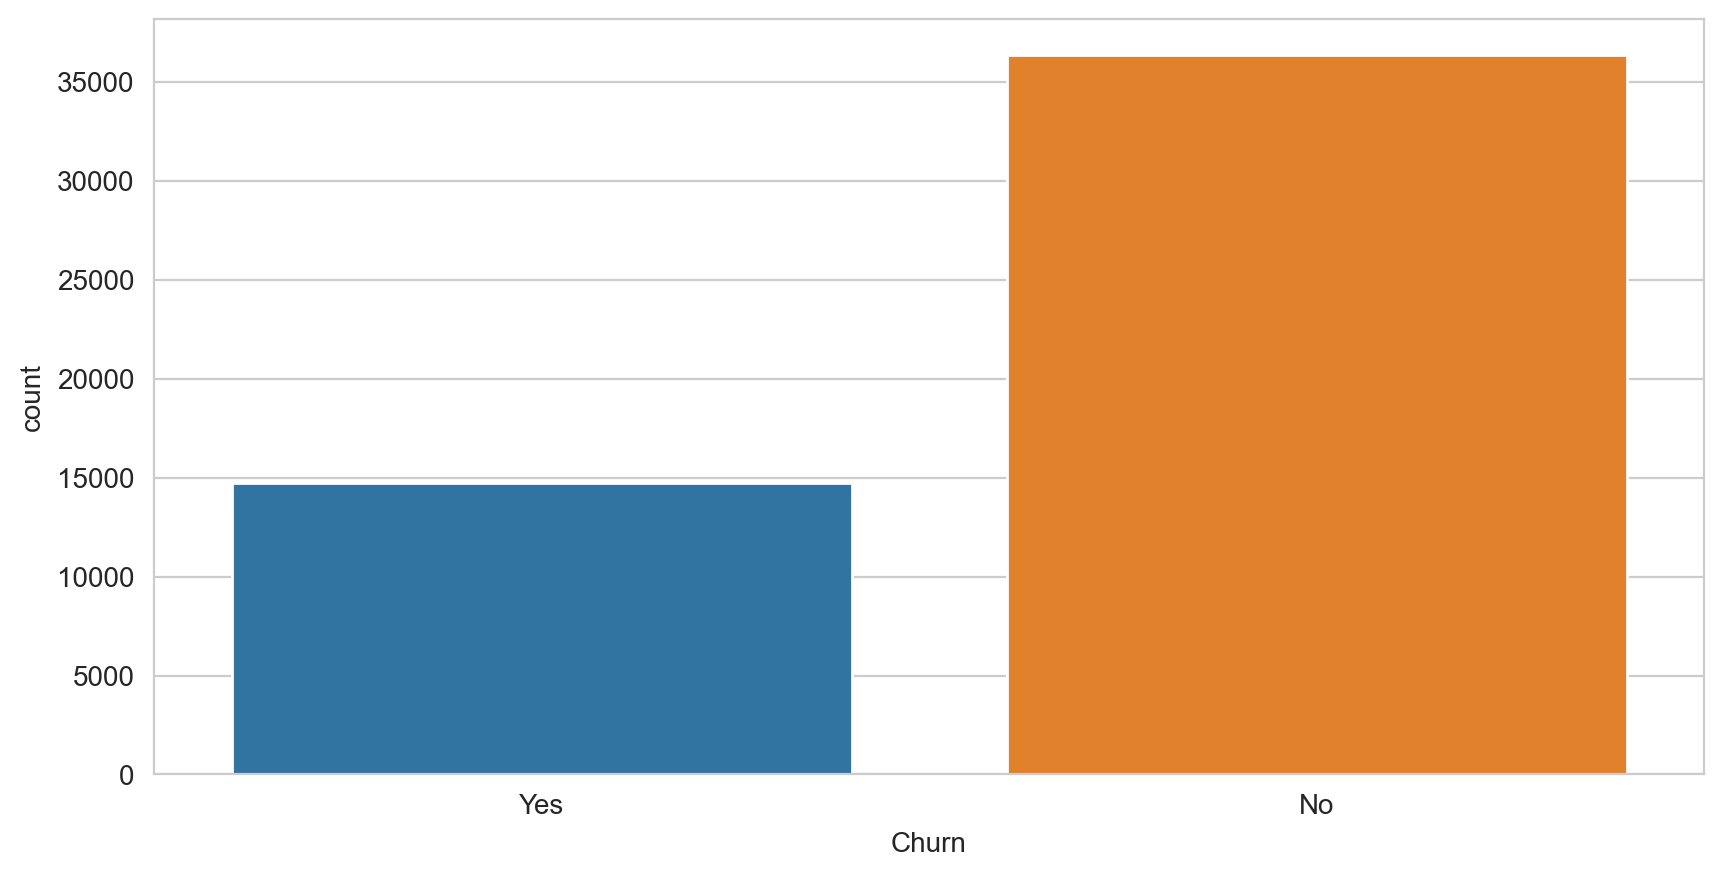

In [25]:
# dependent variable: Churn
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(data =cust_df, x='Churn')
plt.show()

<mark> __Data Cleaning Changelog:__
- Dropped 'CustomerID' column as it is a unique identifier and not useful in analysis
- Changed 'Unknown' values (with the exception of 'HomeOwnership' column, as it is a binary of "Known" and "Unknown") to NaN in dataset
- Cast 'CreditRating' into numeric: '1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'
- Cast 'HandsetPrice' to float

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [26]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
print('Number of customer with zero monthly revenue:', 
      cust_df[cust_df['MonthlyRevenue']==0]['MonthlyRevenue'].count())

## Drop customers with zero monthly revenue
cust_df = cust_df[cust_df['MonthlyRevenue']!=0.0]
cust_df

Number of customer with zero monthly revenue: 6


,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,0,4,No,0,30.0,Yes,1,Suburban,Professional,No
1,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,0,5,No,0,30.0,No,4,Suburban,Professional,Yes
2,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,0,6,No,0,NaN,No,3,Town,Crafts,Yes
3,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,0,6,No,0,10.0,No,4,Other,Other,No
4,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,0,9,No,1,10.0,No,1,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,...,0,6,No,0,60.0,No,1,Suburban,Other,Yes
51043,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,...,0,9,No,1,60.0,No,3,Other,Other,No
51044,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,...,0,7,No,1,80.0,No,5,Other,Clerical,No
51045,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0,9,No,0,30.0,No,5,Other,Other,No


In [27]:
# Number of customers with negative monthly revenue
print('Number of customer with negative monthly revenue:', 
      cust_df[cust_df['MonthlyRevenue']<0]['MonthlyRevenue'].count())

## Drop customers with negative monthly revenue
cust_df = cust_df[cust_df['MonthlyRevenue'] > 0.0]

# confirm that negative monthly revenue values have been dropped
print('\nCheck:\nNumber of customer with negative monthly revenue:', 
      cust_df[cust_df['MonthlyRevenue']<0]['MonthlyRevenue'].count())

Number of customer with negative monthly revenue: 3

Check:
Number of customer with negative monthly revenue: 0


<mark> __Data Cleaning Changelog:__
- Dropped 'MonthlyRevenue' rows <= 0; total count of 9 such instances

### Q1.2 How many columns has missing values percentage > 5%

In [28]:
#Calculate for each column % of missing value in the data
print('Percentage of missing values for each column:')
for i in cust_df.columns.tolist():
    print(i, ':', str(round((cust_df[i].isna().sum()/len(cust_df))*100,4)) +'%')

print('\n------------------------------------------------------------------------\n')   
    

#How many columns has missing values percentage > 5%
count = 0
more_5 = []
for i in cust_df.columns.tolist():
    if (cust_df[i].isna().sum()/len(cust_df))*100 > 5:
        more_5.append(i)
        count = count + 1
    else:
        pass

print('List of columns with missing values percantages >5%:\n', more_5)
print('\nNumber of columns with missing values percentages >5%:', count)

print('\n------------------------------------------------------------------------\n') 

#What strategy should be used for imputation?
missing_num_cat_col(cust_df)

Percentage of missing values for each column:
Churn : 0.0%
MonthlyRevenue : 0.0%
MonthlyMinutes : 0.0%
TotalRecurringCharge : 0.0%
DirectorAssistedCalls : 0.0%
OverageMinutes : 0.0%
RoamingCalls : 0.0%
PercChangeMinutes : 0.4088%
PercChangeRevenues : 0.4088%
DroppedCalls : 0.0%
BlockedCalls : 0.0%
UnansweredCalls : 0.0%
CustomerCareCalls : 0.0%
ThreewayCalls : 0.0%
ReceivedCalls : 0.0%
OutboundCalls : 0.0%
InboundCalls : 0.0%
PeakCallsInOut : 0.0%
OffPeakCallsInOut : 0.0%
DroppedBlockedCalls : 0.0%
CallForwardingCalls : 0.0%
CallWaitingCalls : 0.0%
MonthsInService : 0.0%
UniqueSubs : 0.0%
ActiveSubs : 0.0%
ServiceArea : 0.0472%
Handsets : 0.002%
HandsetModels : 0.002%
CurrentEquipmentDays : 0.002%
AgeHH1 : 1.7786%
AgeHH2 : 1.7786%
ChildrenInHH : 0.0%
HandsetRefurbished : 0.0%
HandsetWebCapable : 0.0%
TruckOwner : 0.0%
RVOwner : 0.0%
Homeownership : 0.0%
BuysViaMailOrder : 0.0%
RespondsToMailOffers : 0.0%
OptOutMailings : 0.0%
NonUSTravel : 0.0%
OwnsComputer : 0.0%
HasCreditCard : 0.0%


### <mark> Group 5 remarks: 
- There are 2 columns with missing values >5%: 'HandsetPrice' and 'MaritalStatus'
- There are 8 other columns with missing values: 7 are numerical and 1 is categorical. % of missing values in these columns are <5% and we might consider dropping them from the dataset

In [29]:
cust_df['HandsetPrice'].describe()
cust_df['HandsetPrice'].median()
cust_df['HandsetPrice'] = cust_df['HandsetPrice'].fillna(60.0)

count    21968.000000
mean        82.357975
std         60.435837
min         10.000000
25%         30.000000
50%         60.000000
75%        130.000000
max        500.000000
Name: HandsetPrice, dtype: float64

60.0

In [30]:
cust_df= cust_df.drop('MaritalStatus', axis = 1)

In [31]:
cust_df.dropna(subset=['MonthlyRevenue',
                       'ServiceArea',
                       'MonthlyMinutes', 
                       'TotalRecurringCharge', 
                       'DirectorAssistedCalls', 
                       'OverageMinutes', 
                       'RoamingCalls', 
                       'PercChangeMinutes', 
                       'PercChangeRevenues', 
                       'Handsets', 
                       'HandsetModels', 
                       'CurrentEquipmentDays', 
                       'AgeHH1', 
                       'AgeHH2'], inplace= True)

<mark> __Data Cleaning Changelog:__
- **'HandsetPrice':** as the std is too large (shown above), we filled missing values with the median (="60.0")
- **'MaritalStatus':** we explored looking at other columns for information to fill the missing values but were unsuccessful. To avoid bias in the dataset, weighed with the explanatory power on our target variable = 'Churn', we decided to drop the column from the dataset
- For the missing vales in other columns, as they are <5%, we decided to drop the rows with missing values

In [32]:
# checking for NaN 
check_nan_int(cust_df)

Columns with missing values:

No of columns with missing values: 0


In [33]:
# create a numeric columns list and a categorical columns list.
num_cols  = []
cat_cols = []
num_cat_col_identifier(cust_df)

List of numerical columns:
 ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating']


List of categorical columns:
 ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNew

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

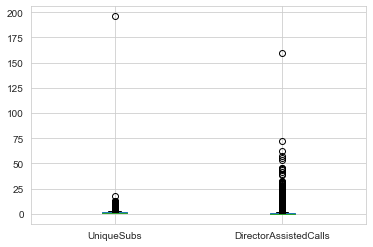

In [34]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

### <mark> Group 5 remarks: 
- Initial box plot shows high incidences of outliers, indicating high skew.
- We will proceed to remove the top 1% and review again.

<AxesSubplot:>

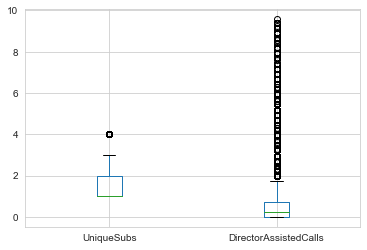

In [35]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again

#Use "quantile" function to identify top 1% outliers
q1_us = cust_df['UniqueSubs'].quantile(0.99)
q1_dac = cust_df['DirectorAssistedCalls'].quantile(0.99)

#remove the top 1% ouliers from the above mentioned two columns
cust_df = cust_df[cust_df['UniqueSubs'] < q1_us]
cust_df = cust_df[cust_df['DirectorAssistedCalls'] < q1_dac]

#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cust_df.boxplot(column=cols)

### <mark> Group 5 remarks: 
- Top 1% of the outliers are removed to allow for more accurate analysis of the general population as seen in the boxplot where UniqueSubs and DirectorAssistedCalls are clustered together. 
- After removing top 1% of outliers, the resulting boxplot reveals that the data is closer to interquartile range. The ‘DirectorAssistedCalls’ boxplot reveals the possibility of removing more outliers that are outside the interquartile range.
    

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

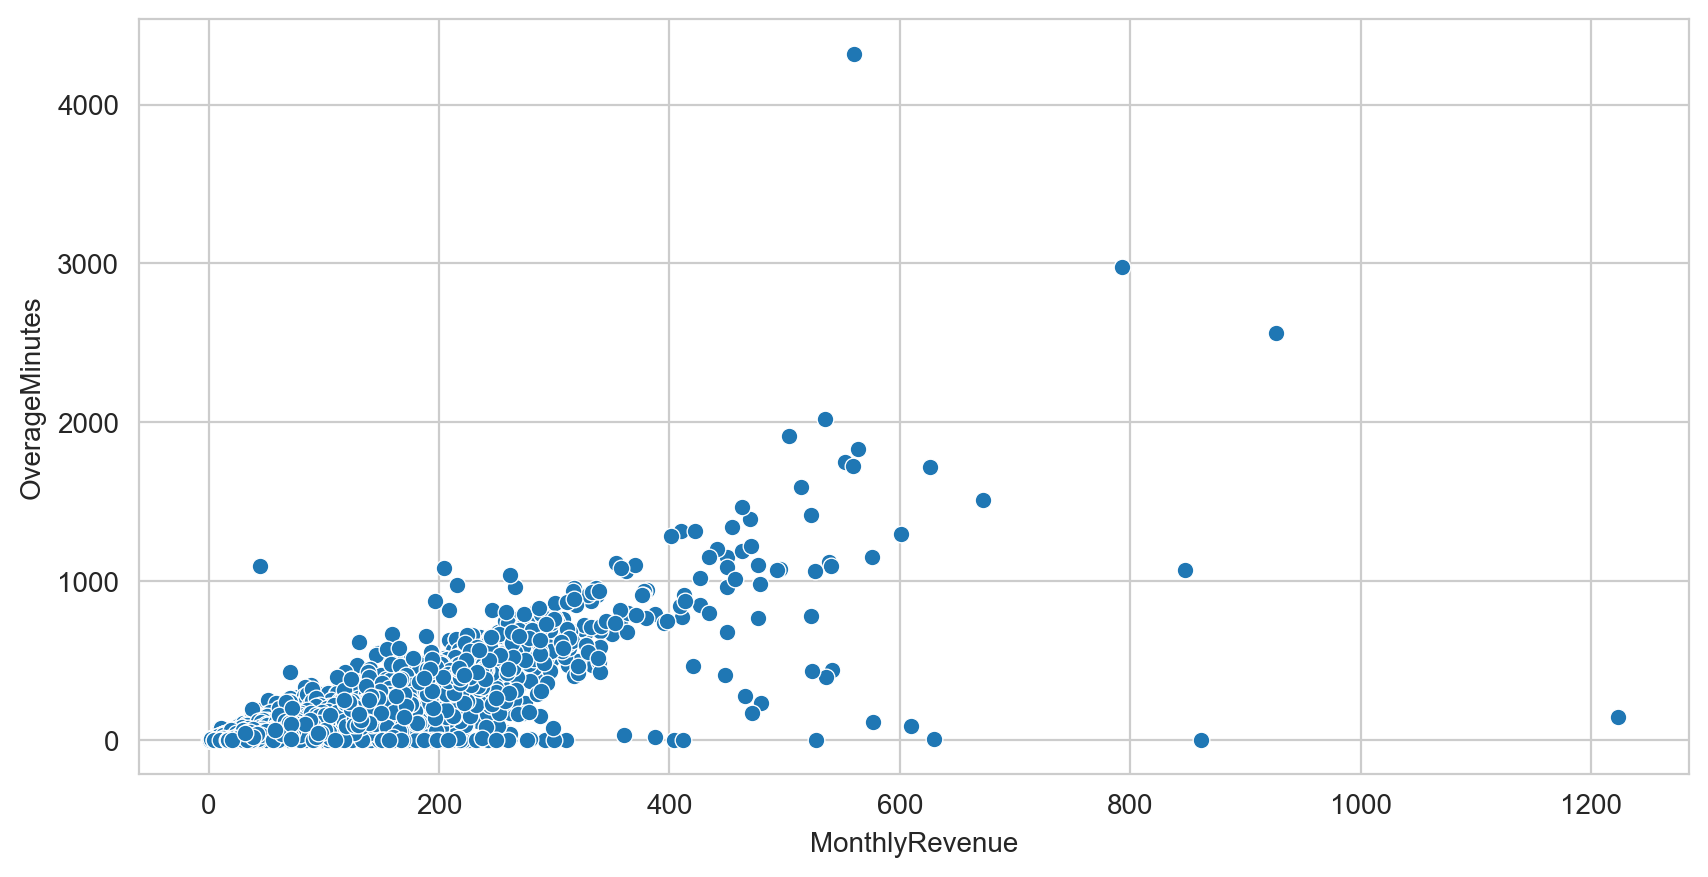


----------------------------------------------------------------------------------

The correlation coefficient between monthly revenue and overage minutes is: 
0.7838372672631972


In [36]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)
plt.show()
print('\n----------------------------------------------------------------------------------\n')
print('The correlation coefficient between monthly revenue and overage minutes is: ')
print(cust_df[['MonthlyRevenue','OverageMinutes']].corr()['MonthlyRevenue']['OverageMinutes'])

### <mark> Group 5 remarks: 
- There seems to be a positive relationship between 'OverageMinutes' and 'MonthlyRevenue', and this is confirmed by high positive correlation of 0.7838
- This seems like a logical conclusion given that a high amount of OverageMinutes (defined as 'extra minutes above the postpaid allocation') will lead to increased charges for the customer, and thus lead to higher revenue for the telecommunications company

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

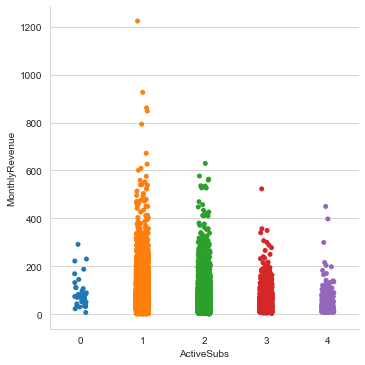

In [37]:
#use category plot to plot monthly revenue for each active subs category
plt.figure(figsize=(10,10), dpi=200)
sns.catplot(data = cust_df, x = 'ActiveSubs', y='MonthlyRevenue') 
plt.show()

### <mark> Group 5 remarks: 
- There seems to be a negative relationship between the number of ActiveSubs vs. MonthlyRevenue from the catplot above
- This can be further confirmed by looking at the mean MonthlyRevenue in each ActiveSub bucket that should confirm lower MonthlyRevenue for a higher number of ActiveSubs

### Q2.3 Does credit rating have an impact in churn rate?

Churn value:


0    34700
1    13942
Name: Churn, dtype: int64

-------------------------------------------------------------------------------


Text(0, 0.5, '% Customers')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Churn Rate')

Text(-0.1, 67.33752723983389, '71.3%')

Text(0.9, 24.66247276016611, '28.7%')

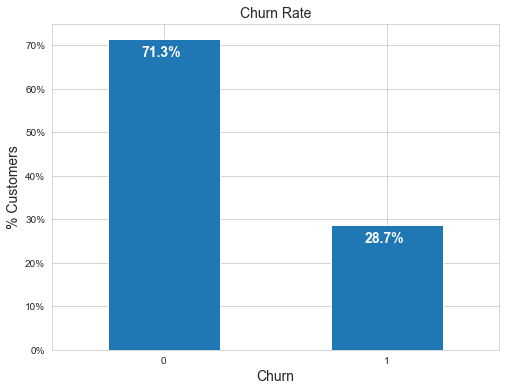

In [38]:
#Converting churn variable in a binary numeric variable
cust_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
cust_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Churn value
print('Churn value:')
cust_df['Churn'].value_counts()
print('-------------------------------------------------------------------------------')

ax = (cust_df['Churn'].value_counts()*100.0 /len(cust_df)).plot(kind='bar',stacked = True,rot = 0, figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

### <mark> Group 5 remarks: 
- 71.3% of the customers is not expected to churn whereas 28.7% are expected to churn in a month based on the current model used by the company. 

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

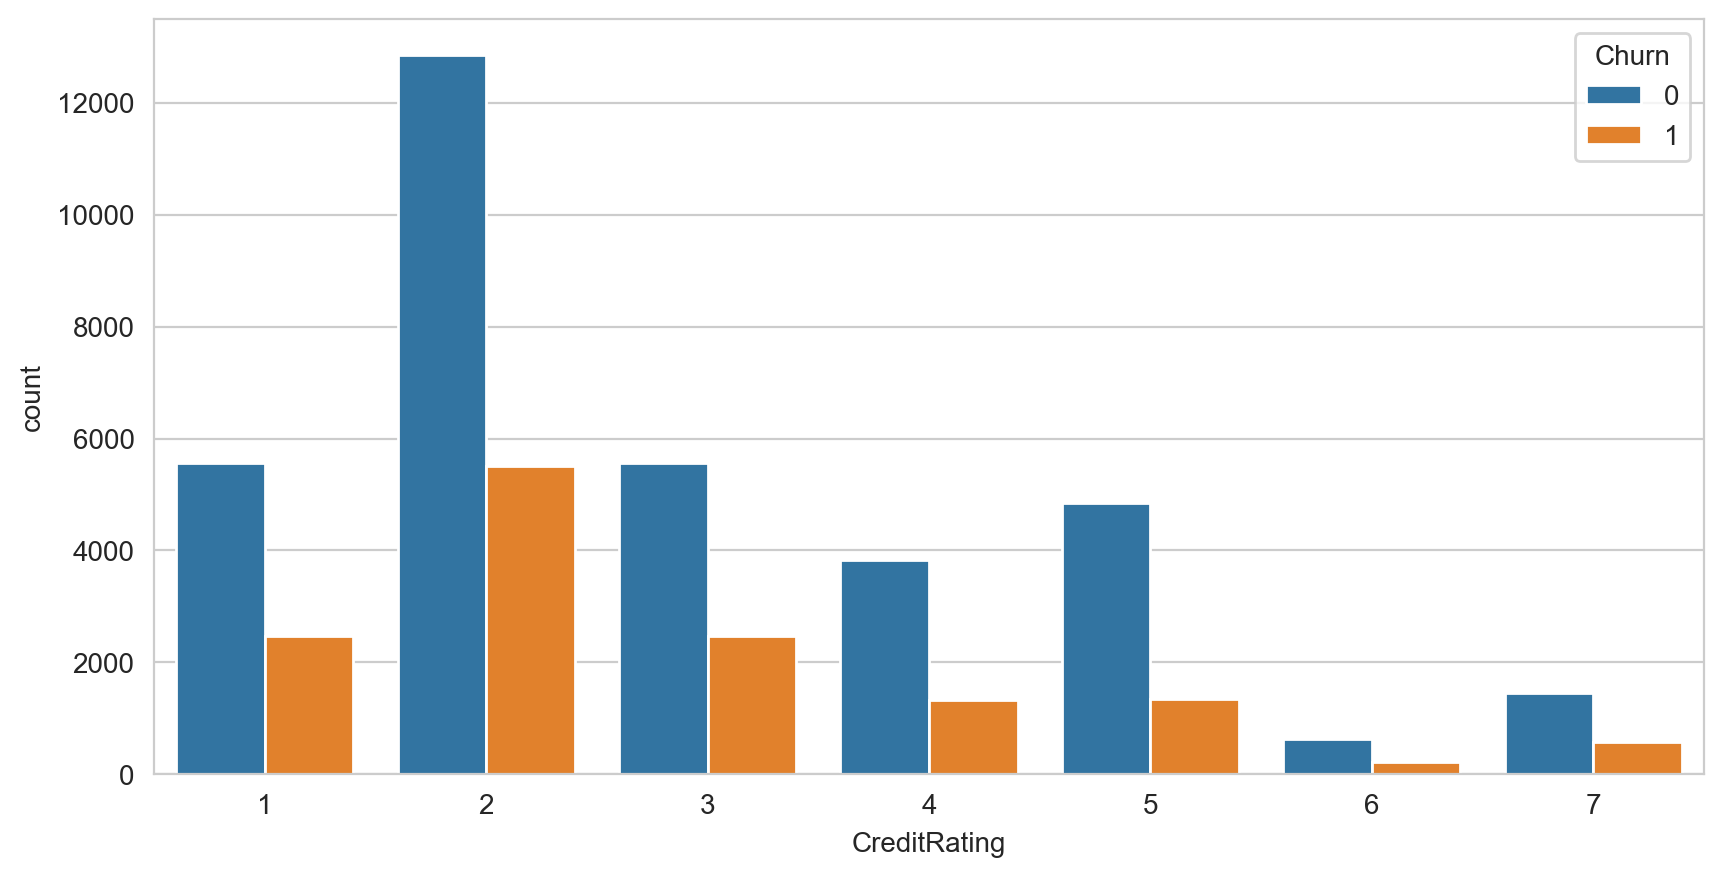

In [39]:
#Credit Rating vs Churn
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(data=cust_df, x='CreditRating', hue='Churn')
plt.show()

In [40]:

print('Correlation Coefficient between Churn and CreditRating:')
print(round(cust_df[['Churn', 'CreditRating']].corr()['Churn']['CreditRating'],4))


Correlation Coefficient between Churn and CreditRating:
-0.0478


### <mark> Group 5 remarks:    
- Highest positive churn occurs when credit rating is “High”, and positive churn generally decrease as credit rating becomes lower. 
- In all credit ratings, the negative churn result outweighs the positive churn results. 
- The low correlation coefficient (-0.0478) indicates weak impact in churn rate to credit rating. 
- The lower churn rate for customers with lower credit rating could be due to a smaller sample size. 

### Placeholder for additional exploratory analysis

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='PercChangeMinutes', ylabel='Density'>

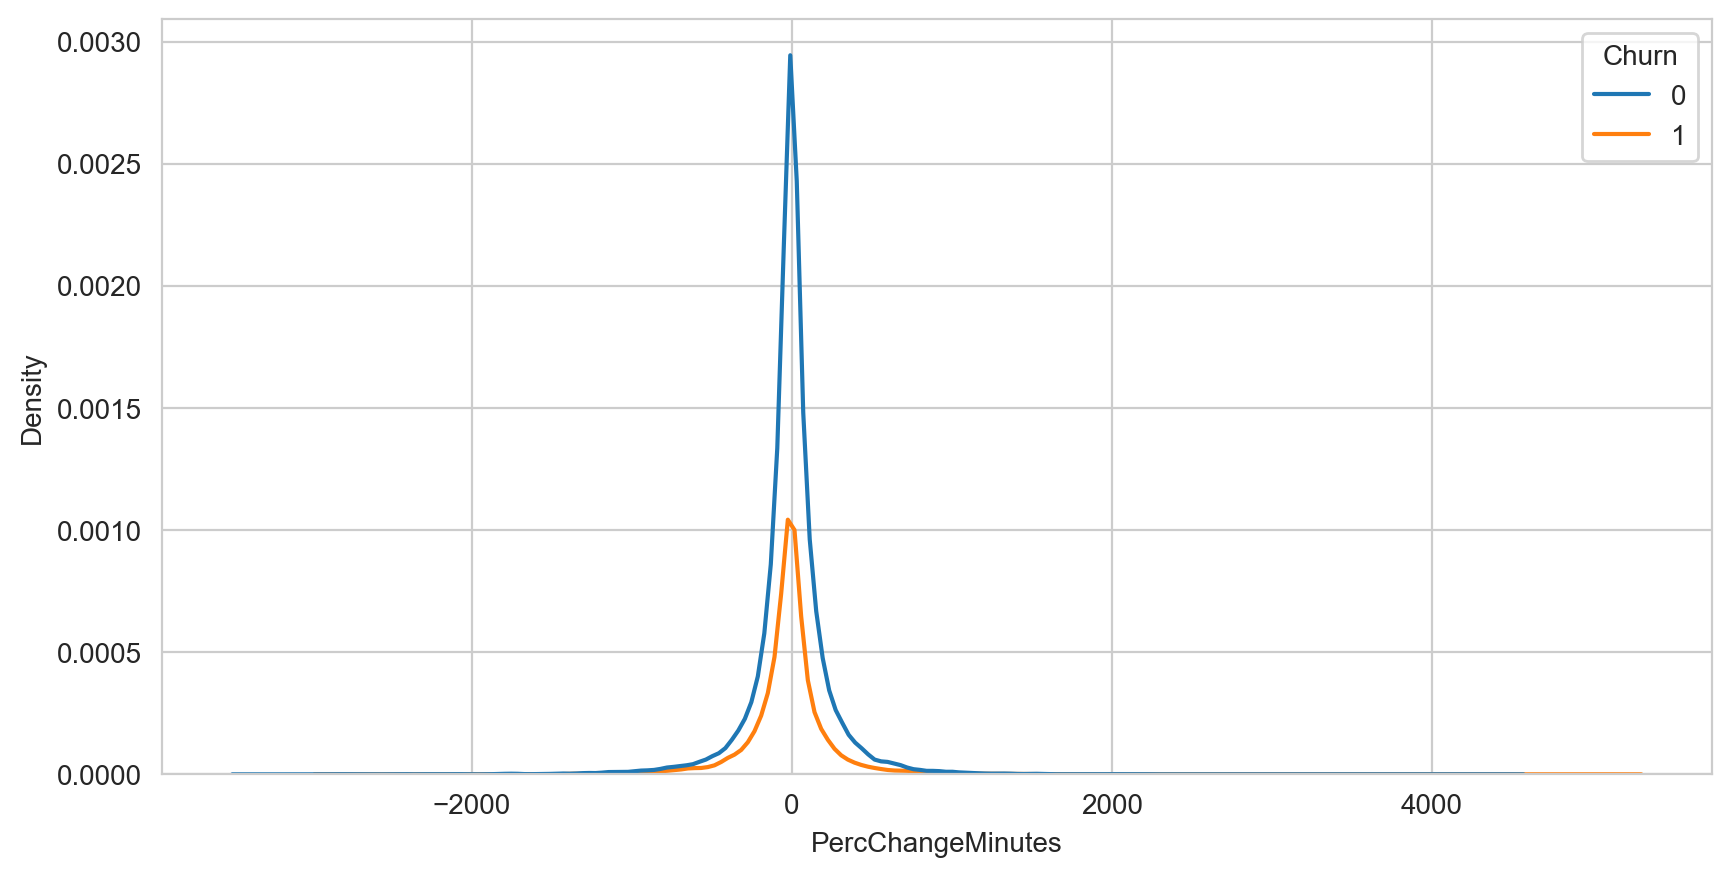

In [41]:
plt.figure(figsize=(10,5), dpi=200)
sns.kdeplot(data= cust_df, x='PercChangeMinutes', hue = 'Churn')
plt.show()

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='TotalRecurringCharge', ylabel='Density'>

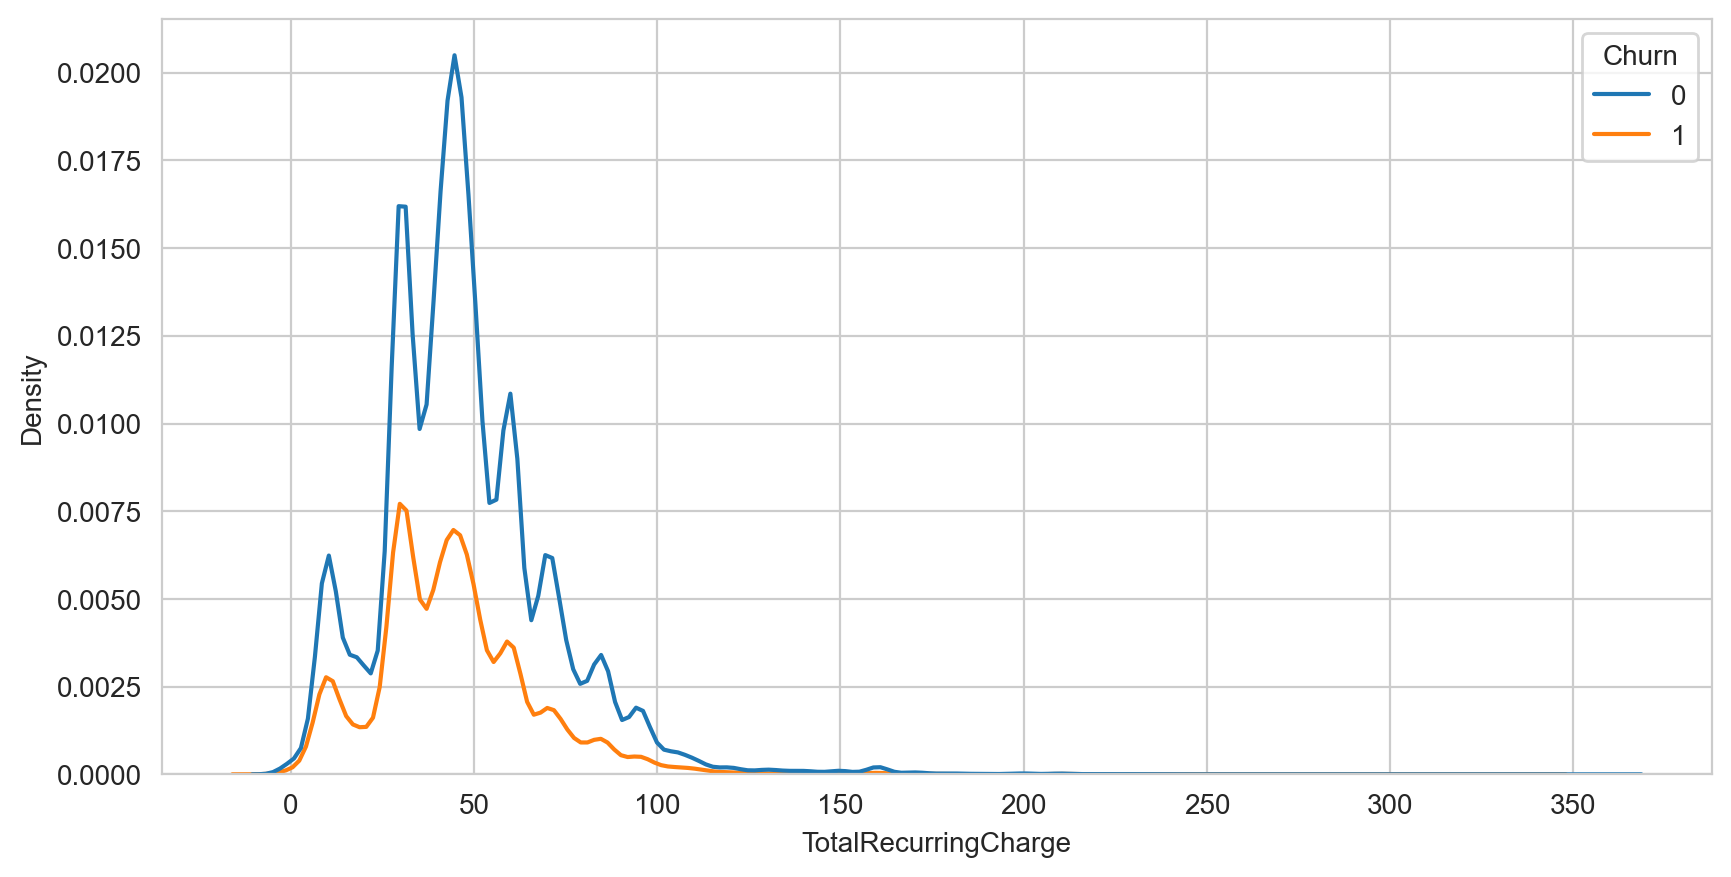

In [42]:
plt.figure(figsize=(10,5), dpi=200)
sns.kdeplot(data= cust_df, x='TotalRecurringCharge', hue = 'Churn')
plt.show()

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='DirectorAssistedCalls', ylabel='Density'>

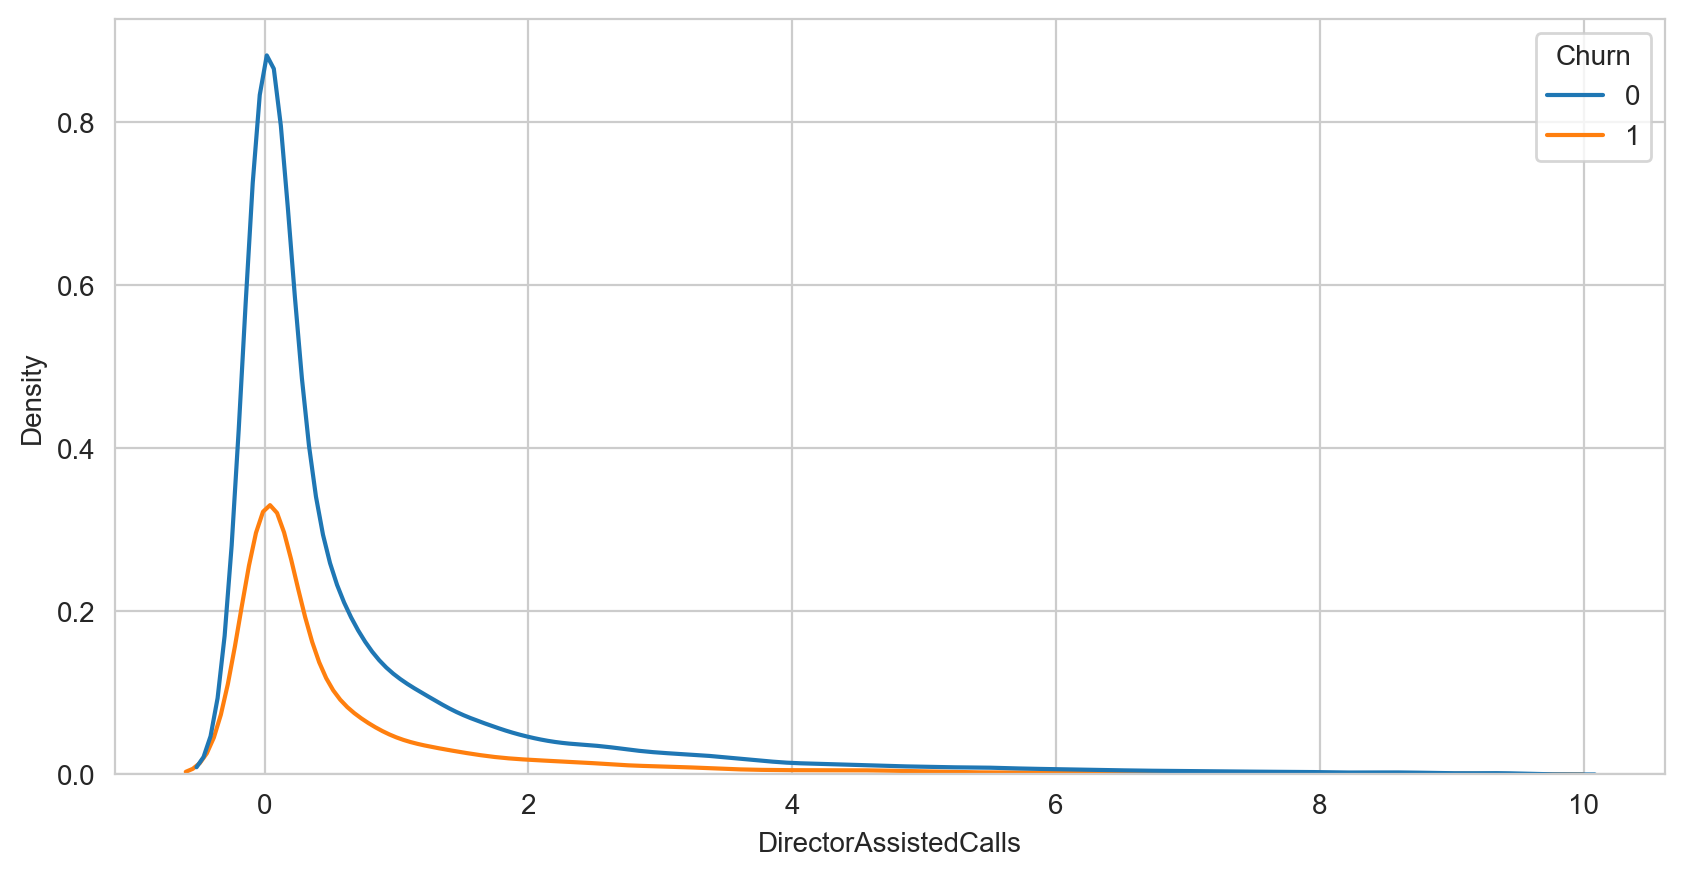

In [43]:
plt.figure(figsize=(10,5), dpi=200)
sns.kdeplot(data= cust_df, x='DirectorAssistedCalls', hue = 'Churn')
plt.show()

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='Density'>

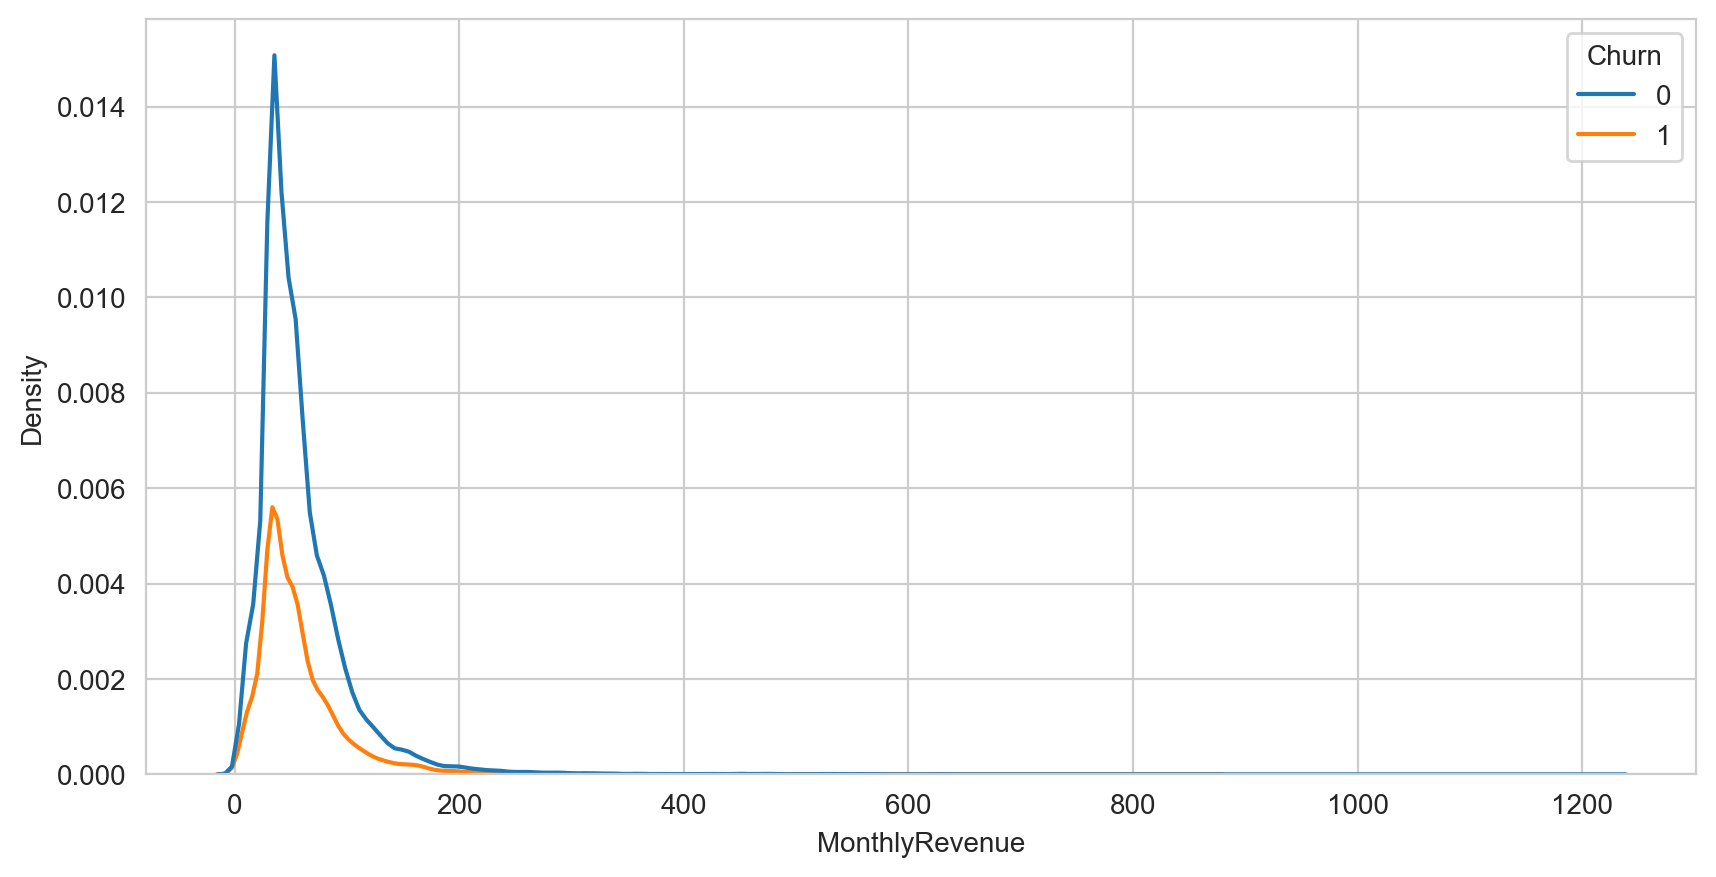

In [44]:
plt.figure(figsize=(10,5), dpi=200)
sns.kdeplot(data= cust_df, x='MonthlyRevenue', hue = 'Churn')
plt.show()

### <mark> Group 5 remarks: 
- Based on the similar shaped graphs, "PercChangeMinutes", “TotalRecurringCharge”, “DirectorAssistedCalls” and “MonthlyRevenue” seems to have little correlation to either positive or negative churn.  

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='MonthlyRevenue'>

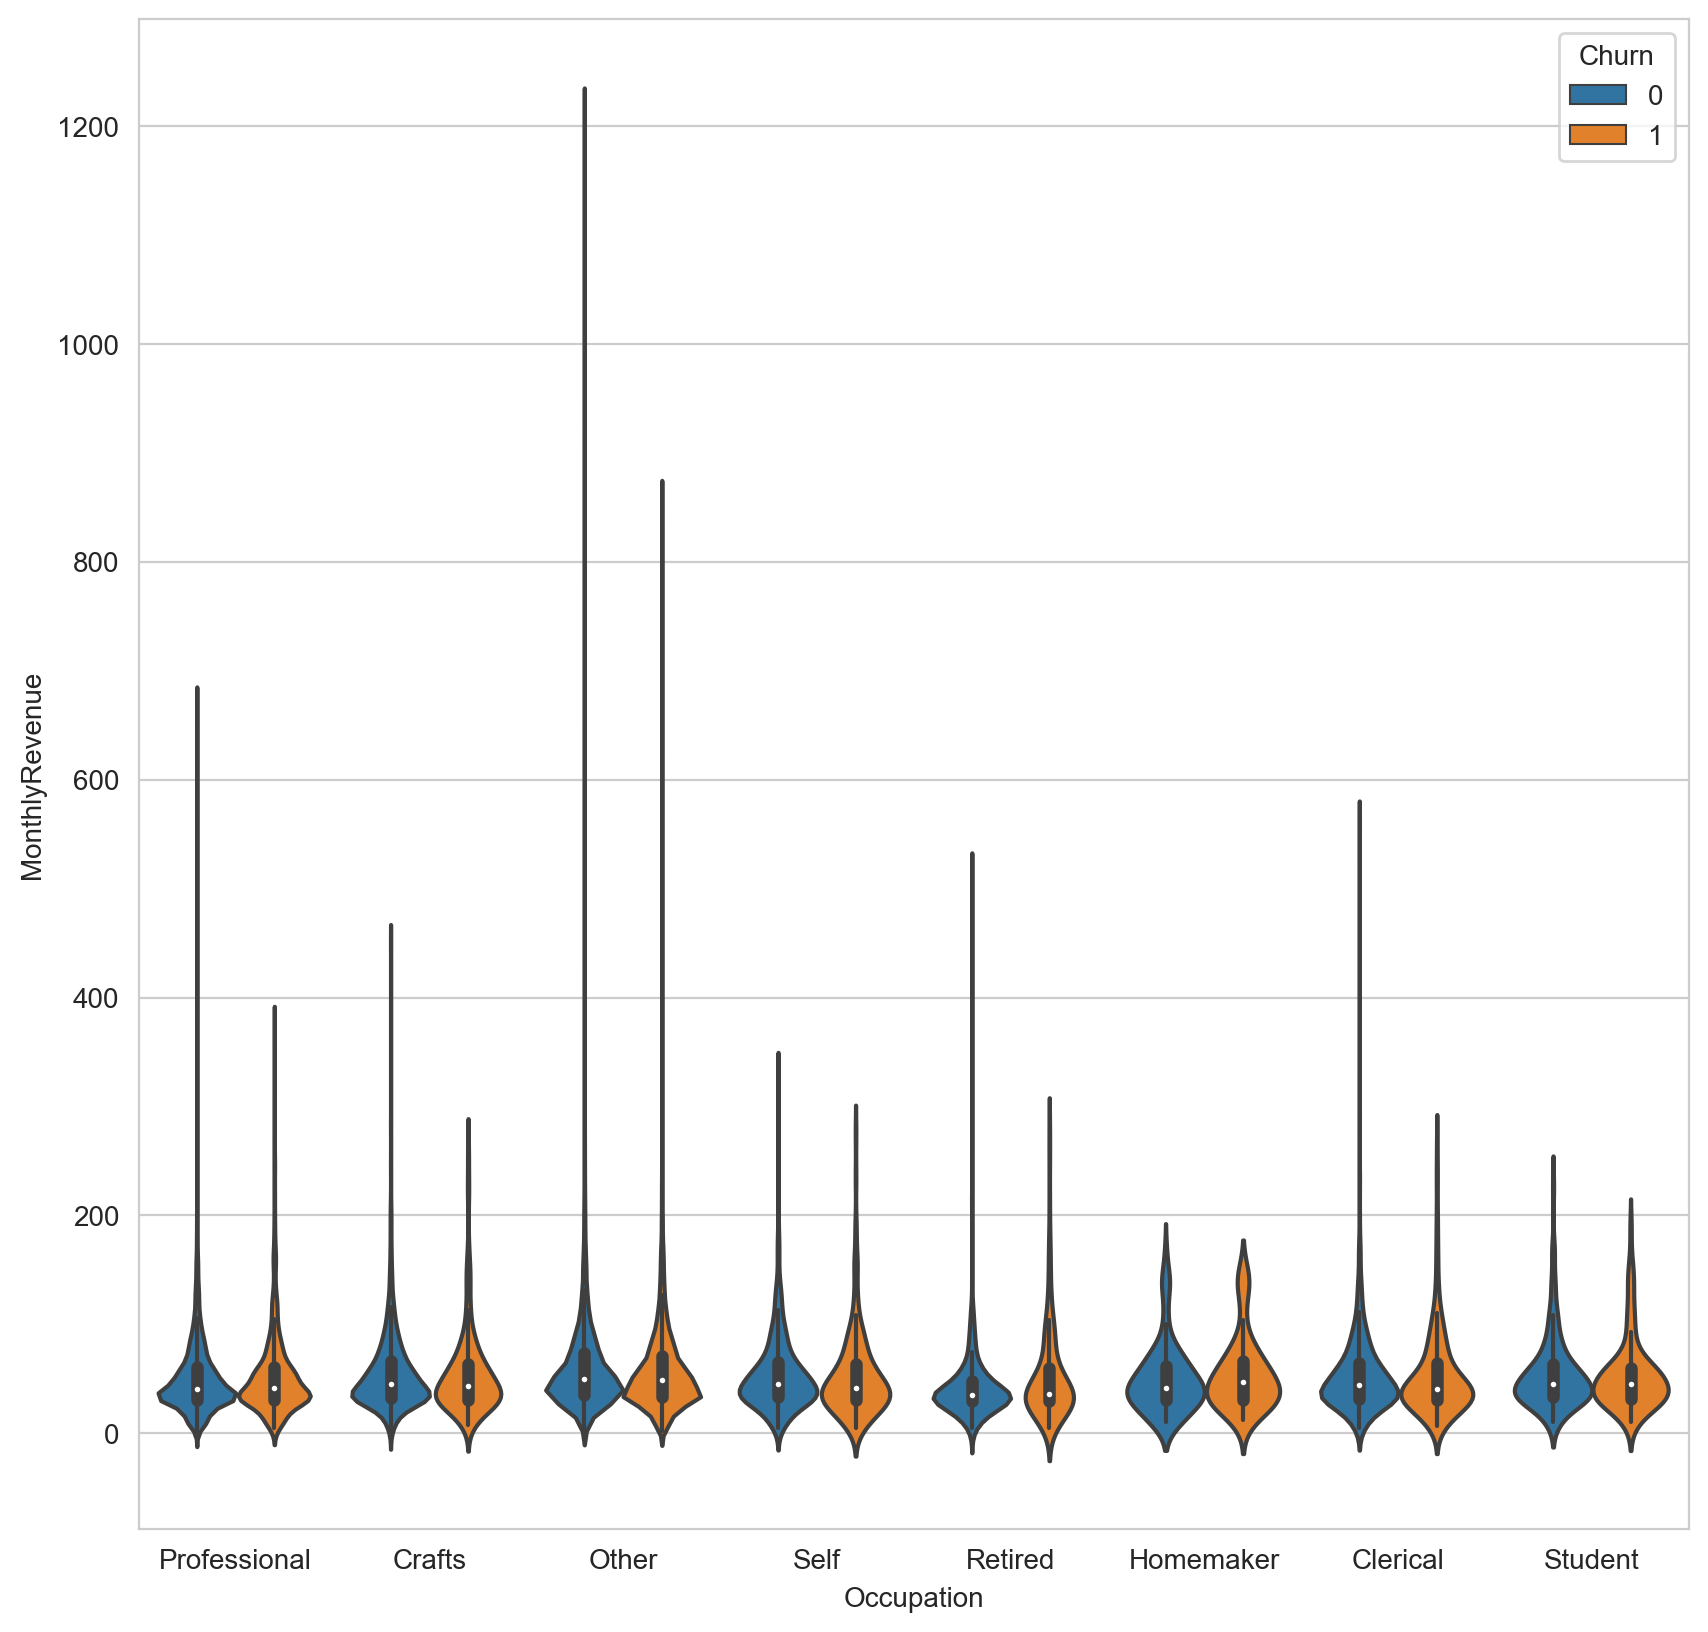

In [45]:
plt.figure(figsize=(10,10), dpi=200)
sns.violinplot(data= cust_df, x='Occupation', y ='MonthlyRevenue', hue = 'Churn')
plt.show()

### <mark> Group 5 remarks: 
- The violin plots fo not seem to reveal any significant relationship between occupation, monthly revenue against churn. 
- The frequency of data points of each occupation seem to be similar.
- The plots reveal the extent of outliers we would need to remove within each occupational dataset should we wish to look further into the segregation of customers by occupation.

In [46]:
# Customer tenure and churn
tenure_churn = cust_df[cust_df['Churn'] == 1]['MonthsInService'].value_counts()
tenure_no_churn = cust_df[cust_df['Churn'] ==0]['MonthsInService'].value_counts()


<Figure size 3000x2000 with 0 Axes>

<AxesSubplot:ylabel='MonthsInService_x'>

<AxesSubplot:ylabel='MonthsInService_y'>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'When the churn picks')

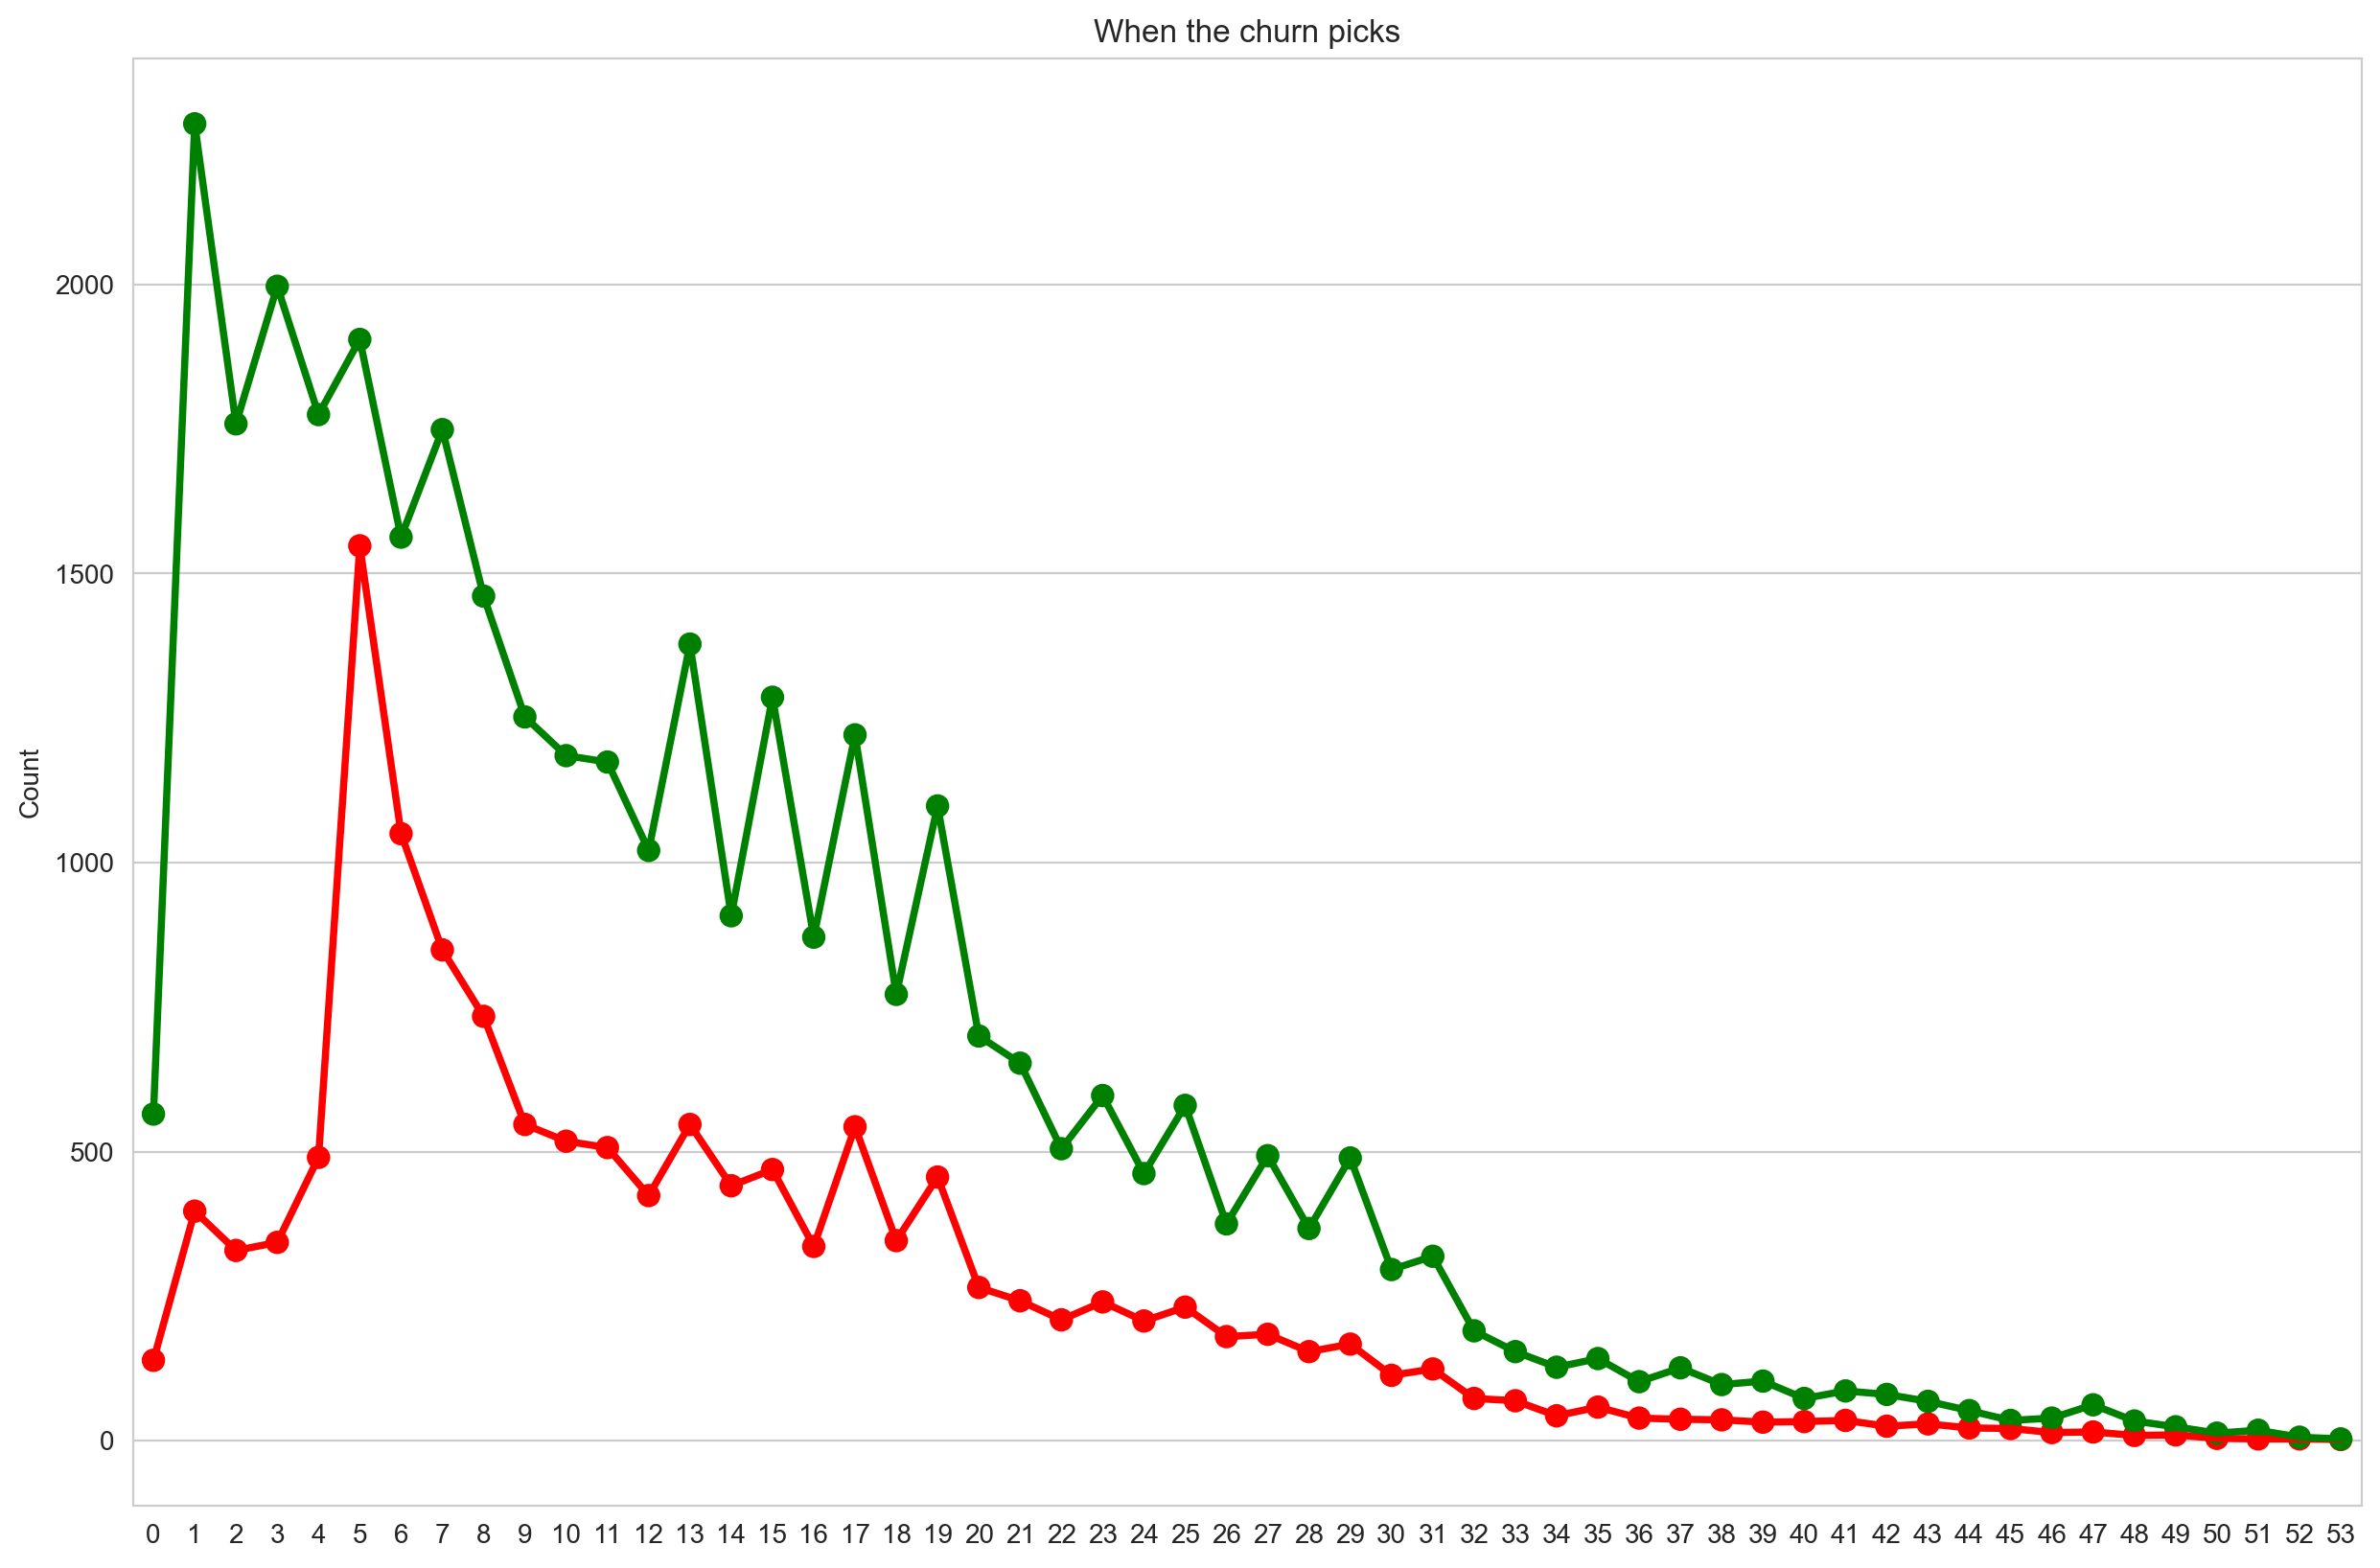

In [47]:
# Customer tenure and churn
tenure_churn = cust_df[cust_df['Churn'] == 1]['MonthsInService'].value_counts()
tenure_no_churn = cust_df[cust_df['Churn'] ==0]['MonthsInService'].value_counts()

tenure = pd.merge(tenure_churn.reset_index(), tenure_no_churn.reset_index(), on='index')
tenure = tenure.sort_values(by='index')
tenure = tenure.reset_index().drop(columns='level_0')

plt.figure(figsize=(15,10), dpi=200)
plt.grid(True)
sns.pointplot(x=tenure.index, y=tenure['MonthsInService_x'], color='red')
sns.pointplot(x=tenure.index, y=tenure['MonthsInService_y'], color='green')
plt.ylabel('Count')
plt.title('When the churn picks')

### <mark> Group 5 remarks: 
- The plot shows a timeline of customer’s months of service (‘MonthsInService) plotted against the count of customers churn (‘Churn’). 
- For a clearer comparison across months of service, we will proceed to standardise churn by plotting the percentage of positive customer churn and percentage of negative customer churn against months of service instead. 

<Figure size 3000x2000 with 0 Axes>

<AxesSubplot:ylabel='MonthsInService_x'>

<AxesSubplot:ylabel='MonthsInService_y'>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'When the churn picks')

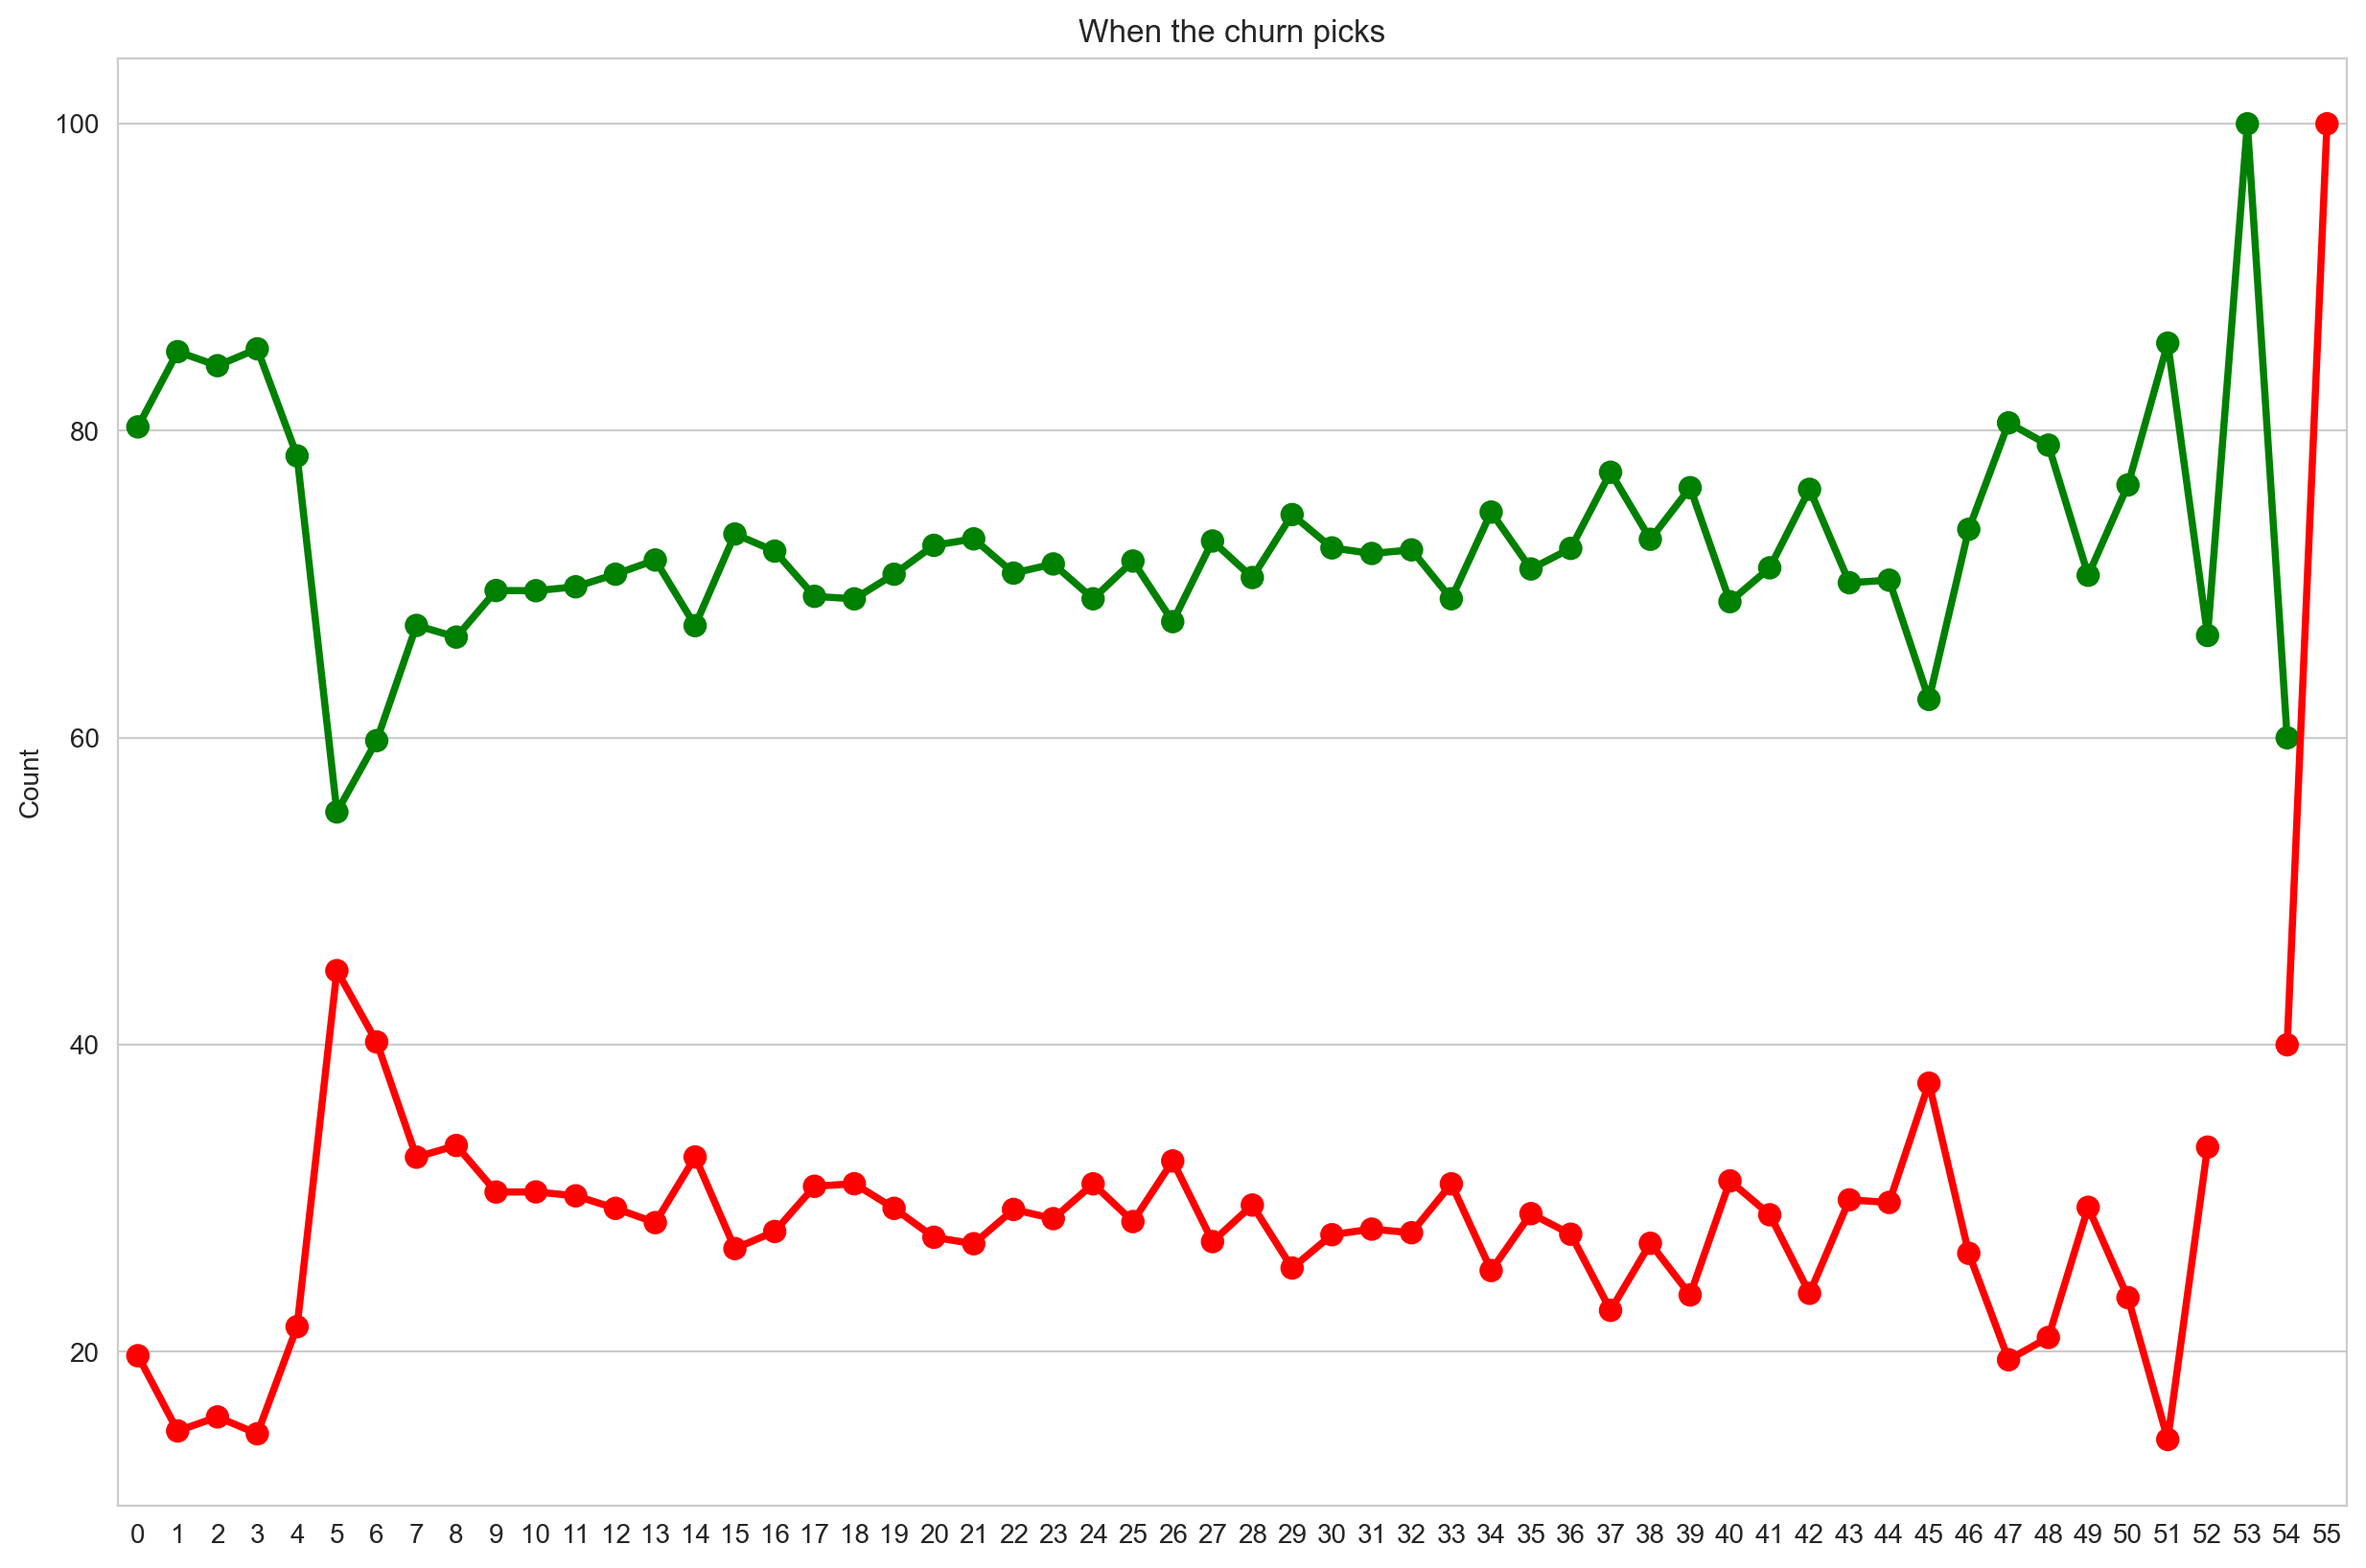

In [48]:
# Customer tenure and churn
tenure_churn_norm = cust_df[cust_df['Churn'] == 1]['MonthsInService'].value_counts()/cust_df['MonthsInService'].value_counts()*100
tenure_no_churn_norm = cust_df[cust_df['Churn'] ==0]['MonthsInService'].value_counts()/cust_df['MonthsInService'].value_counts()*100

tenure_norm = pd.merge(tenure_churn_norm.reset_index(), tenure_no_churn_norm.reset_index(), on='index')
tenure_norm = tenure_norm.sort_values(by='index')
tenure_norm = tenure_norm.reset_index().drop(columns='level_0')

plt.figure(figsize=(15,10), dpi=200)
plt.grid(True)
sns.pointplot(x=tenure_norm.index, y=tenure_norm['MonthsInService_x'], color='red')
sns.pointplot(x=tenure_norm.index, y=tenure_norm['MonthsInService_y'], color='green')
plt.ylabel('Count')
plt.title('When the churn picks')

### <mark> Group 5 remarks: 
- The standardised plot shows a steep lead up in churn rate from the 3rd month and peaking at the 5th month mark, where it settles to a plateau around 35%, with a lift again at the 45th month mark. The large graph variation beyond the 46th month will be ignored due to few data points.  

- From the plot we can recommend the company starts intervention to prevent churn from the 3rd month onwards to drastically reduce possibility of 5th month churn rate peak, and again before the churn rate increase drastically at the 45th month. The chart also provides us information about the average churn rate currently for the company’s future goals and benchmarking.

## Q3. Create additional features to help predict churn

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='Occupation', ylabel='MonthlyRevenue'>

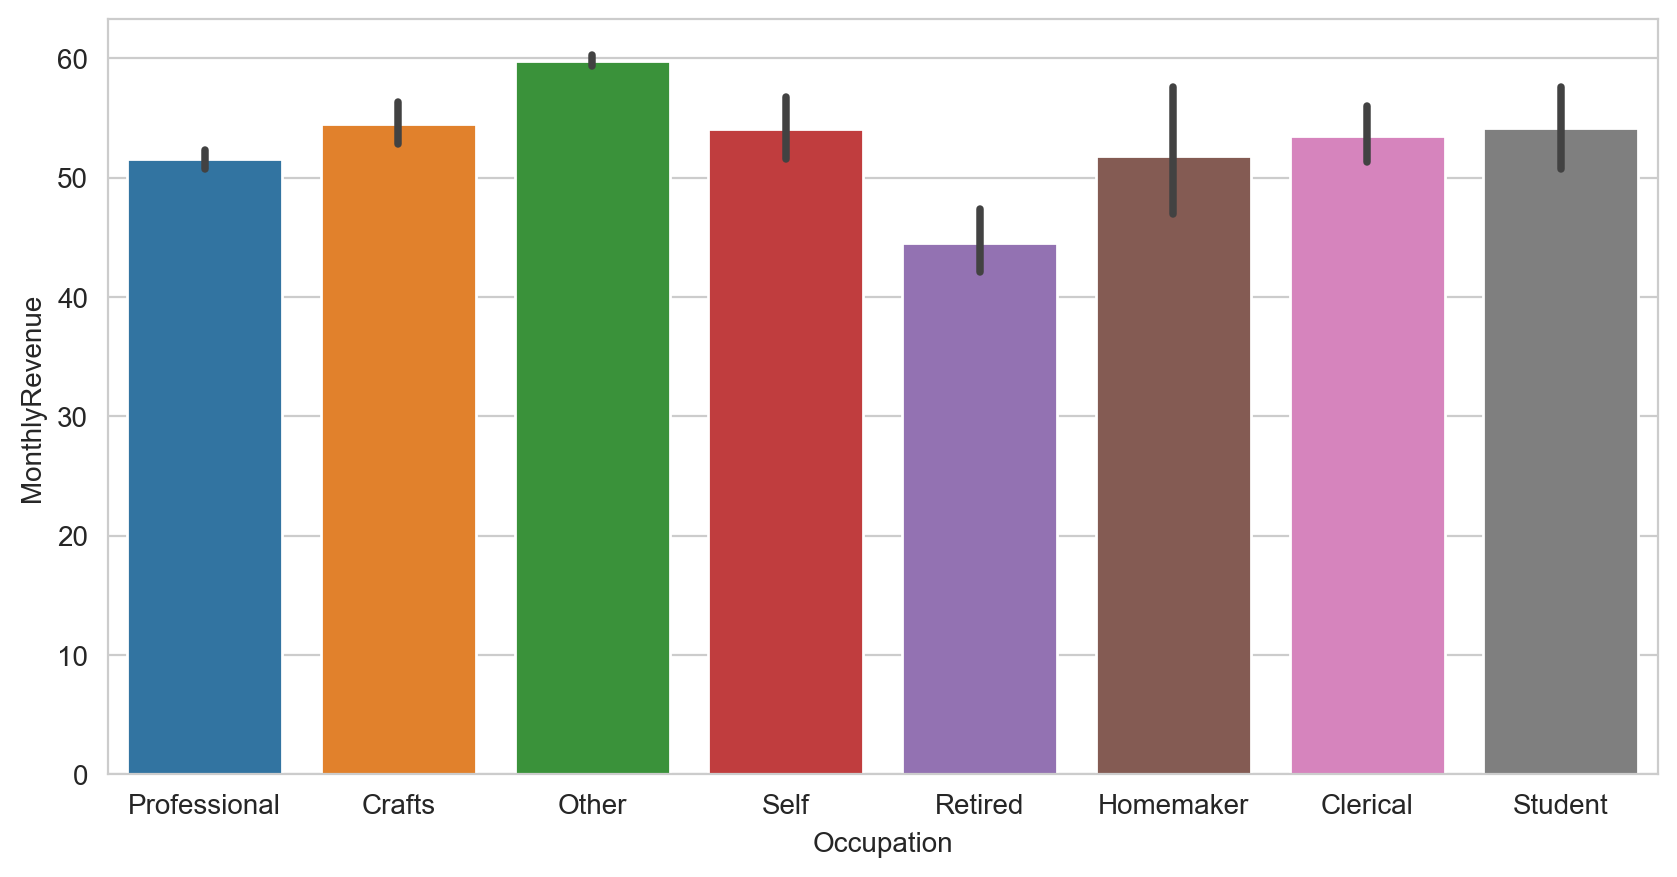

In [49]:
plt.figure(figsize=(10,5), dpi=200)
# Before transform the type of Occupation column, let's check it's distribution first
graph = cust_df[["Occupation", "MonthlyRevenue"]]
sns.barplot(x="Occupation", y="MonthlyRevenue", data=cust_df)
plt.show()

In [50]:
#Converting yes/no variables into binary numeric variables
#for i in new_cat_cols:
#    if cust_df[i].nunique() == 2:
#        cust_df[i].replace(to_replace='Yes', value=1, inplace=True)
#        cust_df[i].replace(to_replace='No',  value=0, inplace=True)
#        cust_df[i].replace(to_replace='Known', value=1, inplace=True)
#        cust_df[i].replace(to_replace='Unknown',  value=0, inplace=True)
#    elif i == 'PrizmCode':
        # Mapping string values into integer based on its values
#        mapping_PrizmCode = {"Other": 0, "Suburban": 1, "Town": 2, "Rural": 3}
#        cust_df[i].replace(to_replace=mapping_PrizmCode, inplace =True)
#    elif i == 'Occupation':
        # Transform string values to numbers using mapping
#        temp = (cust_df.loc[:, ["Occupation", "MonthlyRevenue"]].groupby("Occupation").mean().sort_values(["MonthlyRevenue"], ascending=[0]))
#        mapping_Occupation = dict([temp.index[i], i] for i in range(len(temp)))
#        print(mapping_Occupation)
#        cust_df[i].replace(to_replace=mapping_Occupation, inplace=True)
#    else:
#        pass
    


In [51]:
#cust_df['ServiceArea'] = cust_df['ServiceArea'].astype(str)
#cust_df['ServiceArea']

In [52]:
# Transform ServiceArea column only to keep the float value
#cust_df['ServiceArea'] = cust_df['ServiceArea'].apply(lambda x: x[-3:])
#cust_df['ServiceArea'] = cust_df['ServiceArea'].astype(float)

In [53]:
#for i in cat_cols:
#    print(i)
#    print(cust_df[i].value_counts())
#    print('')

In [54]:
cust_df= cust_df.drop('ServiceArea', axis = 1)

<mark> __Data Cleaning Changelog:__
- Dropped 'ServiceArea' column as there are too many unique values to provide any useful analysis for 'Churn'

In [55]:
cust_df.isna().sum()

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetRefurbished           0
HandsetW

In [56]:
cust_df.dtypes

Churn                          int64
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                     float64
HandsetModels                float64
C

In [57]:
print(cust_df[cust_df['MonthlyMinutes']==0].count()['MonthlyMinutes'])
print(cust_df[cust_df['OverageMinutes']==0].count()['OverageMinutes'])

656
22384


In [58]:
cust_df[(cust_df['MonthlyMinutes']==0) &
        (cust_df['OverageMinutes']==0)]

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
4,1,17.14,0.0,17.0,0.0,0.0,0.0,0.0,-0.2,0.0,...,Yes,0,9,No,1,10.0,No,1,Other,Professional
90,1,27.25,0.0,27.0,0.0,0.0,0.0,0.0,-0.2,0.0,...,Yes,0,8,No,0,10.0,No,1,Town,Other
110,1,13.25,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Yes,0,7,No,0,30.0,No,1,Other,Other
152,1,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Yes,0,3,No,1,60.0,Yes,1,Other,Other
212,1,5.00,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Yes,0,1,Yes,1,100.0,No,1,Suburban,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50448,1,26.37,0.0,26.0,0.0,0.0,0.0,0.0,21.1,0.0,...,No,0,6,No,0,60.0,No,5,Suburban,Other
50571,1,10.00,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0,6,No,0,60.0,No,4,Suburban,Self
50607,0,30.09,0.0,30.0,0.0,0.0,0.0,0.0,-0.1,0.0,...,No,0,6,No,0,60.0,No,1,Other,Other
50745,1,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,No,0,4,No,0,10.0,No,3,Other,Other


<AxesSubplot:xlabel='MonthlyMinutes', ylabel='Density'>

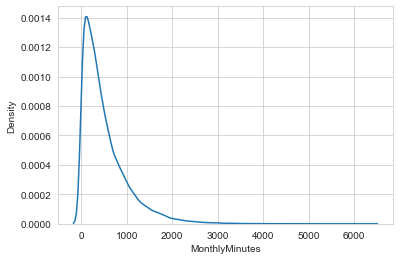

In [59]:
sns.kdeplot(data=cust_df, x='MonthlyMinutes')

### <mark> Group 5 remarks: 
- For all instances where "MonthlyMinutes" equal 0, "OverageMinutes" is also equal to 0
- From KDE plot, most "MonthlyMinutes" occur at less than 1000 minutes.

In [60]:
#wrapper function to create additional features for churn prediction

def create_features(df):
    
    #3.1 Percent of current active subs over total subs
    df['perc_active_subs'] = df['ActiveSubs'] / df['UniqueSubs']*100
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    df['perc_recurrent_charge']= df['TotalRecurringCharge']/df['MonthlyRevenue'] *100
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df

    df['perc_overage_min'] = df['OverageMinutes']/df['MonthlyMinutes']*100
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return df  


In [61]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_min
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,No,0,30.0,Yes,1,Suburban,Professional,50.0,91.666667,0.000000
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,No,0,30.0,No,4,Suburban,Professional,100.0,100.058858,0.000000
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,No,0,60.0,No,3,Town,Crafts,100.0,100.000000,0.000000
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,No,0,10.0,No,4,Other,Other,100.0,91.152163,0.000000
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,No,1,10.0,No,1,Other,Professional,100.0,99.183197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,1,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,12.3,...,No,0,60.0,No,1,Other,Professional,100.0,78.247261,6.562500
51037,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,...,No,0,60.0,No,3,Other,Other,100.0,53.258145,68.253968
51040,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,...,No,0,60.0,No,1,Other,Professional,100.0,97.235727,0.552486
51041,1,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,...,No,0,30.0,No,5,Other,Professional,100.0,25.534088,65.104167


In [62]:
cust_df['perc_overage_min'] = cust_df['perc_overage_min'].fillna(0.0)

In [63]:
len(cust_df.columns)

58

In [64]:
len(cust_df)

48642

<mark> __Data Cleaning Changelog:__
- Fill NaN in 'perc_overage_min' with 0 as 'OverageMinutes' (numerator) and 'MonthlyMinutes' (denominator) = 0

# Create a function that cleans the data wrt the data cleaning log


In [65]:
# CustomerID is a identifier, drop it.
# Change CreditRating
# Change HandsetPrice to be an float
# Drop customers with zero monthly revenue
# Clean the HandsetPrice with its median as the std is too large

def clean_data(df):
    df = df.drop('CustomerID', axis = 1)
    df['CreditRating'] = df['CreditRating'].apply(lambda v : int(v.split('-')[0]) if v else np.nan)
    unknown_to_nan(df)
    df['HandsetPrice'] = df['HandsetPrice'].astype(float)
    df = df[df['MonthlyRevenue']>0.0]
    df['HandsetPrice'] = df['HandsetPrice'].fillna(df['HandsetPrice'].median())
    df= df.drop('MaritalStatus', axis = 1)
    df.dropna(subset=['MonthlyRevenue',
                       'ServiceArea',
                       'MonthlyMinutes', 
                       'TotalRecurringCharge', 
                       'DirectorAssistedCalls', 
                       'OverageMinutes', 
                       'RoamingCalls', 
                       'PercChangeMinutes', 
                       'PercChangeRevenues', 
                       'Handsets', 
                       'HandsetModels', 
                       'CurrentEquipmentDays', 
                       'AgeHH1', 
                       'AgeHH2'], inplace= True)
    df= df.drop('ServiceArea', axis = 1)
    return df

def clean_data_cf(df):
    df['perc_overage_min'] = df['perc_overage_min'].fillna(0.0)
    return df




### <mark> Group 5 remarks: 
- We will use the function to clean the data, using exploratory data analysis done in previous sections.
- This includes dropping "CustomerID", "MaritalStatus", "ServiceArea", changing "HandsetPrice" to float and dropping null value rows.

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [66]:
df_cols_ml = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'perc_active_subs', 'perc_recurrent_charge', 'perc_overage_min']

numerical  = []
categorical = []

for i in df_cols_ml:
    if cust_df[i].dtypes == 'float64' or cust_df[i].dtypes == 'int64':
        numerical.append(i)
    else:
        categorical.append(i)

print('List of numerical columns:\n', numerical)
print('')
print('List of categorical columns:\n', categorical)

List of numerical columns:
 ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'HandsetPrice', 'CreditRating', 'perc_active_subs', 'perc_recurrent_charge', 'perc_overage_min']

List of categorical columns:
 ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'Has

In [67]:
target = ['Churn']


# Perform one-hot encoding to categorical variables 
telco_raw = pd.get_dummies(data=cust_df, columns=categorical, drop_first=False)


# Import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to numerical columns
scaled_numerical = scaler.fit_transform(telco_raw[numerical])

# Build a DataFrame
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

#Drop non-scaled numerical columns 
telco_raw = telco_raw.drop(columns=numerical, axis=1)

scaled_numerical.reset_index(drop=True, inplace=True)
telco_raw.reset_index(drop=True, inplace=True)
# Merge the non-numerical with the scaled numerical data
telco = pd.concat([telco_raw,scaled_numerical], axis =1)


In [68]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = telco.drop('Churn',axis=1)
y = telco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (34049, 83)
Y train shape:  (34049,)
X test shape:  (14593, 83)
Y test shape:  (14593,)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [69]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

#logitic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)

log_model.coef_

LogisticRegression(max_iter=1000)

array([[-8.35666676e-02,  3.93466880e-02, -1.49924364e-01,
         1.05704385e-01,  5.46499090e-02, -9.88698886e-02,
        -6.85246008e-03, -3.73675195e-02, -1.02527828e-02,
        -3.39671968e-02, -5.75013694e-02,  1.32813898e-02,
         3.62188396e-02, -8.04388191e-02, -8.56801255e-03,
        -3.56519670e-02, -3.28161414e-02, -1.14038382e-02,
        -2.22286038e-02, -2.19913758e-02, -3.54803267e-02,
        -8.73965288e-03, -1.11371762e-01,  6.71517821e-02,
        -7.95240816e-03, -3.62675714e-02, -4.61532718e-02,
         1.93329218e-03, -8.84219899e-02,  4.42020103e-02,
        -2.78338678e-01,  2.34118698e-01, -5.08601187e-02,
         1.09558023e-01, -8.30043334e-02, -1.99135506e-02,
        -2.82549018e-02, -2.07722311e-02,  7.35691440e-02,
        -3.50093637e-02, -2.93695794e-02,  1.15494955e-02,
        -6.58014723e-02,  4.98689292e-02, -8.00146060e-02,
        -1.67537956e-01,  5.21367168e-02, -1.78874758e-02,
         1.25531961e-01,  4.63047801e-02, -1.42387395e-0

### <mark> Group 5 remarks: 
First of all, notice that model coefficients look just as they would for a regression model. This is expected as previously explained. Additionally, nearly all the coefficients have the same magnitude indicating this model is likely to be overfit, given the number of features. 

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). Execute the code and the cell below to compute and display a sample of these class probabilities for the test feature set. 

In [70]:
probabilities = log_model.predict_proba(X_test)
print(probabilities[:15,:])

[[0.73341838 0.26658162]
 [0.77078299 0.22921701]
 [0.74337153 0.25662847]
 [0.72403414 0.27596586]
 [0.73139755 0.26860245]
 [0.75929193 0.24070807]
 [0.52455339 0.47544661]
 [0.80375969 0.19624031]
 [0.81951203 0.18048797]
 [0.84230679 0.15769321]
 [0.75054782 0.24945218]
 [0.70400034 0.29599966]
 [0.73723949 0.26276051]
 [0.67820752 0.32179248]
 [0.7827998  0.2172002 ]]


### <mark> Group 5 remarks: 
The first column is the probability of a score of $0$ = 'Churn' = "No" and the second column is the probability of a score of $1$ = 'Churn' = "Yes". Notice that for most, but not all cases, the probability of a score of $0$ is higher than $1$. 

In [71]:
#we want to first confirm the definition of "Positive" and "Negative" labels
#we earlier defined y = 'Churn', where 1 = "Yes" and 0 = "No"

#to confirm the number of 'Churn' = 1 = "Yes" in the original dataset
cust_df['Churn'].sum(), y.sum()

#to confirm the number of 'Churn' = 1 = "Yes" in both y_train and y_test
y_train.sum(), y_test.sum(), y_train.sum() + y_test.sum()

(13942, 13942)

(9782, 4160, 13942)

### <mark> Group 5 remarks: 
As seen from above, we should have 4,160 'Churn' = 1 = "Yes" in our y_test set. Confirm that the logistic regression model has defined 'Positive' as 'Churn' = 0 = "No" and 'Negative' as 'Churn' = 1 = "Yes".

## Score and evaluate the classification model

Now that the class probabilities have been computed these values must be transformed into actual class scores. Recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at $0.5$. The code in the cell below applies this initial threshold to the probability of a score of $0$ for the test data. A few examples along with the known labels are then displayed. Execute this code and examine the result.

In [72]:
#-------------------------------- Model testing ---------------------------------#
#type your code here to predict for X_test data set using the fitted model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluate model accuracy using fitted y value and actual y_test
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(np.array(y_test[:15]))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 0 0 0 0 1 1 1 0]


### <mark> Group 5 remarks: 
None of the positive (1 = 'Churn' = "Yes") agree with the test labels in the second row. To quantify the performance of the model, we use the multiple metrics below: 
To quantify the performance of the model, we use the multiple metrics below: 
- **Confusion Matrix:**  lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as follows:
| | Scored Positive | Scored Negative|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |

Here the four elements in the matrix are defined as:    
**True Positive** or **TP** are cases with positive labels ('Churn' = 0 = "No") which have been correctly classified as positive.     
**True Negative** or **TN** are cases with negative labels ('Churn' = 1 = "Yes") which have been correctly classified as negative.  
**False Positive** or **FP** are cases with negative labels ('Churn' = 1 = "Yes") which have been incorrectly classified as positive.   
**False Negative** or **FN** are cases with positive labels ('Churn' = 0 = "No") which have been incorrectly classified as negative.

In this example, we would want to **ideally minimize FP** as we would not correctly predict churners for intervention methods.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the $1$ case positive and the $0$ case negative. 

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand. 

- **Accuracy:** fraction of cases correctly classified. Be wary that it can be quite misleading. For example, say a classifier is used to detect fraudulent accounts and the rate of fraud is less than 1%. A naive model would be to say all accounts are not fraudulent. This model has accuracy exceeding  0.99. This sounds impressive, but is clearly useless.
$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$


- **Precision:** the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship. In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value.
$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$


- **Recall:** fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship. In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value.
$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$


- **F1:** The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship. In other words, F1 is a weighted metric for overall model performance. In other words, F1 is a weighted metric for overall model performance. 
$$F1 = 2 * \frac{precision * recall}{precision + recall}$$


- **ROC** and **AUC**:
The Receiver Operating Characteristic or ROC is a curve that displays the relationship between the true positive rate on the vertical axis and false positive rate on the horizontal axis. The ROC curve shows the tradeoff between true positive rate and false positive rate.

In principle, you can pick the desired operating point for a classifier on this curve. Towards the left favors low false positive rate at the expense of true positive rate. Towards the right favors high true positive rate at the expense of higher false positive rate.

The AUC is the area or integral under the ROC curve. The overall performance of the classifier is measured by the area under the curve or AUC. But, how can you interpret a specific AUC value? The higher the AUC the lower the increase in false positive rate required to achieve a required true positive rate.  For an ideal classifier the AUC is 1.0. A true positive rate is achieved with a 0 false positive rate. This behavior means that AUC is useful for comparing classifiers. The classifier with higher AUC is generally the better one

For balanced cases, random guessing gives an AUC or 0.5. A balanced case has equal numbers of positive and negative cases. So Bernoulli sampling (random guessing) with a probability $p$ for the positive case, will produce a ROC curve that runs diagonally from $0.0,0.0$ to $1.0,1.0$. The area under this triangular region is 0.5. It is often said that a classifier with an AUC of greater than 0.5 is better than random guessing. But, **for unbalanced cases this statement is not in true in general**. 

****
**Note:** The term receive operating characteristic may seem a bit odd in the machine learning context. This term arose in the early days of radar engineering as a metric to measure the tradeoff between radar signal receiver correctly detecting a target, say an aircraft, and producing a positive response from noise, such as flying birds or clouds. A radar receiver would be adjusted to the desired operating point along its ROC curve. 
****

In [73]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
import sklearn.metrics as sklm
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10309               124
Actual negative      4038               122

Accuracy  0.71
 
           Positive      Negative
Num case    10433          4160
Precision    0.72          0.50
Recall       0.99          0.03
F1           0.83          0.06


### <mark> Group 5 remarks: 
Examine these results:
1. The confusion matrix shows the following characteristics: a) most of the positive cases ('Churn' = "No") are correctly classified, 10,309 vs. 124, however, b) many negative cases ('Churn' = "Yes") are scored incorrectly with only 121 correct vs. 4,039 incorrect.
2. The overall accuracy is 0.71. However, as mentioned above, this can be extremely misleading. In fact, the negative cases ('Churn' = "Yes") are poorly classified, and it is these churners the company cares most about. This is not an unusual case. Accuracy figures should always be regarded with healthy skepticism.
3. The class imbalance is confirmed. Of the 14,594 test cases, 10,593 are positive ('Churn' = "No") and 4,160 are negative ('Churn' = "Yes).
4. The precision, recall and F1 all show that positive cases ('Churn' = "No") are classified reasonably well, but the negative cases ('Churn' = "Yes) are not. As already mentioned, it is these negative cases that are of greatest importance to the company.

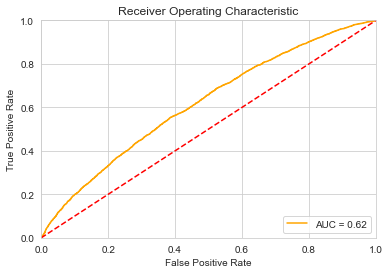

In [74]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities) 

### <mark> Group 5 remarks: 
The ROC curve is above the diagonal red-dotted line and the AUC is 0.62. But, given the class imbalance of two positive cases for each negative case how good is this? 

One point of comparison is a naive 'classifier' that sets all cases to positive. The code in the cell below contains such a classifier. This algorithm is not really a classifier at all. This 'classifier' is hard coded. The ROC curve and AUC are then computed and displayed. Run this code, and examine the result. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10433                 0
Actual negative      4160                 0

Accuracy  0.71
 
           Positive      Negative
Num case    10433          4160
Precision    0.71          0.00
Recall       1.00          0.00
F1           0.83          0.00


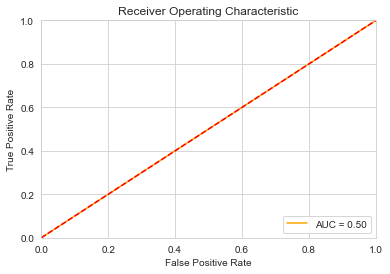

In [75]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive)

### <mark> Group 5 remarks: 
Notice, the accuracy from this 'classifier' is 0.71. This reflects the class imbalance. The ROC curve is directly along the diagonal which gives an AUC of 0.5. The logistic regression classifier is definitely better than this (with AUC = 0.62)!

## Compute a weighted model

Recall that a falsely classifying a churner as a non-churner costs the company more than classifying a non-churner as a churner. Given this situation, the results of the first model are not that good. There are two reasons for this:

1. The class imbalance in the label has biased the training of the model. As you observed from the accuracy of the naive 'classifier' is not that different from the logistic regression model. 
2. Nothing has been done to weight the results toward correctly classifying the churners at the expense of non-churners.

One approach to these problems is to weight the classes when computing the logistic regression model. The code in the cell below adds a `class_weight` argument to the call to the `LogisticRegression` function. In this case weights are chosen as $0.45, 0.55$  but you can also give another combination. Execute this code

In [76]:
log_model = LogisticRegression(class_weight = {0:0.45, 1:0.55}, max_iter = 1000)
log_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.45, 1: 0.55}, max_iter=1000)

Next, execute the code in the cell below to compute and display the class probabilities for each case. 

In [77]:
probabilities = log_model.predict_proba(X_test)
print(probabilities[:15,:])

[[0.69314558 0.30685442]
 [0.73404224 0.26595776]
 [0.70239067 0.29760933]
 [0.68236736 0.31763264]
 [0.69036964 0.30963036]
 [0.72075934 0.27924066]
 [0.47343893 0.52656107]
 [0.77040598 0.22959402]
 [0.78724568 0.21275432]
 [0.81383065 0.18616935]
 [0.71061333 0.28938667]
 [0.66045514 0.33954486]
 [0.69673055 0.30326945]
 [0.63322335 0.36677665]
 [0.74719483 0.25280517]]


### <mark> Group 5 remarks: 
By eyeballing the results, the above probabilities are not terribly different from the unweighted model. 

To find if there is any significant difference with the unweighted model, compute the scores and the metrics and display the metrics by executing the code in the cell below. 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10147               286
Actual negative      3870               290

Accuracy  0.72
 
           Positive      Negative
Num case    10433          4160
Precision    0.72          0.50
Recall       0.97          0.07
F1           0.83          0.12


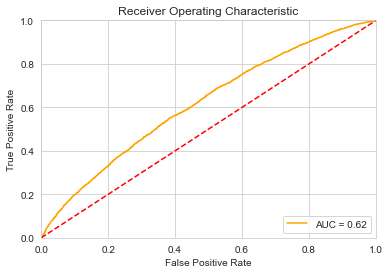

In [78]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)

### <mark> Group 5 remarks: 
The accuracy is slightly changed with respect to the unweighted model. The change could be more had we give more weights to one of the class than what we did here. The precision, recall and F1 are slightly better for the negative cases. Reweighting the labels has moved the results in the desired direction, at least a bit.

Notice also, the ROC curve and AUC are essentially unchanged. The trade-off between true positive and false positive is similar to the unweighted model. 

## Find a better threshold

There is another way to tip the model scoring toward correctly identifying the bad credit cases. The scoring threshold can be adjusted. Until now, the scores have been computed from the probabilities using a threshold of 0.5. However, there is no reason to think this is the correct choice. Recall that the score is  determined by setting the threshold along the sigmoidal or logistic function. It is possible to favor either positive or negative cases by changing the threshold along this curve. 

The code in the cell below contains a function for scoring and evaluating the model for a given threshold value. The `for` loop iterates over the list of five candidate threshold values. Execute this code and examine how changing the threshold value changes the scoring for the model. 

In [79]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.6
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10371                62
Actual negative      4109                51

Accuracy  0.71
 
           Positive      Negative
Num case    10433          4160
Precision    0.72          0.45
Recall       0.99          0.01
F1           0.83          0.02

For threshold = 0.55
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10307               126
Actual negative      4034               126

Accuracy  0.71
 
           Positive      Negative
Num case    10433          4160
Precision    0.72          0.50
Recall       0.99          0.03
F1           0.83          0.06

For threshold = 0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive     10147               286
Actual negative      3870               290

Accuracy  0.72
 
           Positive      Negative
Num case

As the threshold is decreased the number of correctly classified negative cases (churners) increases at the expense of correctly classifying positive cases (non-churners). At the same time, accuracy decreases. However, as you have observed, accuracy is not a particularly useful metric here. 

Exactly which threshold to pick is a business decision. Notice that with a threshold value of 0.25 the number of false negatives (misclassified non-churners) is about 18x that of false positives (misclassified churners)! 

<mark>__Group 5 remarks:__
- Given that there is a higher cost for misclassified churners, we are inclined to recommend a lower threshold to balance between False Positive (misclassified churners) and False Negatives (misclassified non-churners)
- Correctly classifying churners (True Negative) early is a good outcome, but misclassifying non-churners (False Positive) also comes at a cost; if intervention measures are deployed too early or too frequent, this could lead to a reduction in customer satisfaction and/or increased costs from resources invested into intervention measures
- A threshold between 0.30 and 0.35 seem to strike a good balance between FP and FN

# Additional: Using the top 20 features to create the logistic model.

In [80]:
from pandas import DataFrame

df_1= DataFrame(telco.columns.tolist(), columns = ['features'])
df_2 = DataFrame(log_model.coef_.reshape(-1,1), columns = ['Coeff'])


lm = pd.concat([df_1,df_2], axis =1)
lm['abs_coeff'] = abs(lm['Coeff'])

lm_sort20 = lm.sort_values(by='abs_coeff',ascending=False).head(20)
lm_sort20

,features,Coeff,abs_coeff
70,HandsetModels,0.320511,0.320511
30,OwnsMotorcycle_Yes,-0.267024,0.267024
31,MadeCallToRetentionTeam_No,0.244392,0.244392
65,CallWaitingCalls,-0.198984,0.198984
45,MonthlyRevenue,-0.165713,0.165713
50,RoamingCalls,-0.142163,0.142163
2,ChildrenInHH_Yes,-0.139899,0.139899
48,DirectorAssistedCalls,0.126609,0.126609
52,PercChangeRevenues,0.117937,0.117937
3,HandsetRefurbished_No,0.117268,0.117268


In [81]:
new_lm_col = lm_sort20['features'].tolist()[1:]

In [82]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = telco[new_lm_col]
y = telco['Churn']

X_train_agg, X_test_agg, y_train_agg, y_test_agg = train_test_split(X, y, test_size=0.3, random_state=101)

print('X train shape: ', X_train_agg.shape)
print('Y train shape: ', y_train_agg.shape)
print('X test shape: ', X_test_agg.shape)
print('Y test shape: ', y_test_agg.shape)

X train shape:  (34049, 19)
Y train shape:  (34049,)
X test shape:  (14593, 19)
Y test shape:  (14593,)


LogisticRegression()

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10342                91
Actual negative      4082                78

Accuracy  0.71
 
           Positive      Negative
Num case    10433          4160
Precision    0.72          0.46
Recall       0.99          0.02
F1           0.83          0.04


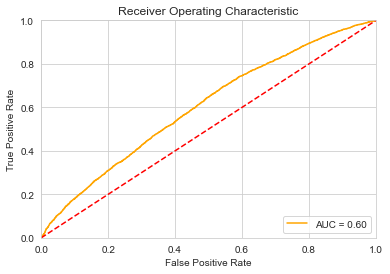

In [83]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set


#logitic regression
from sklearn.linear_model import LogisticRegression

log_model_agg = LogisticRegression()
log_model_agg.fit(X_train_agg, y_train_agg)

probabilities = log_model_agg.predict_proba(X_test_agg)
scores = score_model(probabilities, 0.5)
print_metrics(y_test_agg, scores)  
plot_auc(y_test_agg, probabilities)

### <mark> Group 5 remarks: 
- Using only the top 20 features to create a logistic regression model, we found the AUC = 0.60, which is just slightly worse than the initial model of AUC = 0.62, using all features.
- This suggest that using the top 20 features could be a good estimate for the entirety of all features for logistic regression purpose.

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [84]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [85]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# We define the model
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, y_train)

# We predict target values
y_predict_rfcla = rfcla.predict(X_test)


RandomForestClassifier(n_jobs=-1, random_state=9)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10183               250
Actual negative      3851               309

Accuracy  0.72
 
           Positive      Negative
Num case    10433          4160
Precision    0.73          0.55
Recall       0.98          0.07
F1           0.83          0.13


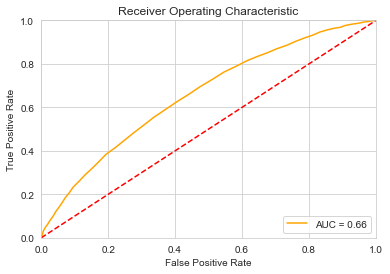

In [86]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
# We predict target values

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

# Test score

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

probabilities_rfcla = rfcla.predict_proba(X_test)
scores_rfcla = score_model(probabilities_rfcla, 0.5)
print_metrics(y_test, scores_rfcla)  
plot_auc(y_test, probabilities_rfcla)

In [87]:
scores_rfcla

array([0, 0, 0, ..., 0, 0, 0])

### <mark> Group 5 remarks: 
- Using Random Forest classifier method on the same dataset, we found the AUC = 0.66, which is the higher than all our attempts at optimising the AUC results using the logistic regression method.
- Random Forest can handle categorical features very well and it can handle high dimensional spaces as well as a large number of training examples.
- This signify that Random Forest Classifier method is a more accurate machine learning algorithm to be used for this problem, compared to logistics regression method.
  

# Additional: Hyperparameter Tuning for Random Forest Classifier

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)


rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [64, 100, 128, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)
print(CV_rfc.best_params_)



GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200, 700],
                         'oob_score': [True, False]})

{'bootstrap': False, 'max_features': 'log2', 'n_estimators': 128, 'oob_score': False}


In [89]:
rfc1=RandomForestClassifier(n_estimators = 128, max_features='log2', bootstrap = False , oob_score = False)

In [90]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=128)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10166               267
Actual negative      3820               340

Accuracy  0.72
 
           Positive      Negative
Num case    10433          4160
Precision    0.73          0.56
Recall       0.97          0.08
F1           0.83          0.14


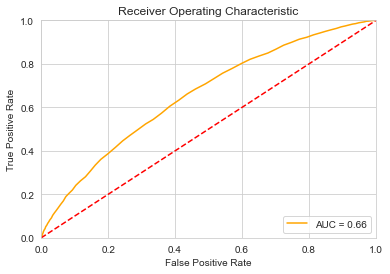

In [91]:
probabilities_rfc1 = rfc1.predict_proba(X_test)
scores_rfc1 = score_model(probabilities_rfc1, 0.5)
print_metrics(y_test, scores_rfc1)  
plot_auc(y_test, probabilities_rfc1)

### <mark> Group 5 remarks: 
- Since ideally we would like to minimise false positives, the tuned Random Forest Classifier model with a higher positive recall score is applicable.
- By using hyperparameter tuning with GridSearch, a slightly higher positive recall score is acheived at expense of negative recall and precision. 


<mark>__Result:__
    
-  The default Random Forest Classifier model is the best model, with highest AUC and positive recall score. 
- However, for this project, we will just use the default Random Forest Classier.

### Q4.3 Identify most important features impacting churn

In [92]:
# Type your code here to plot the top 20 important predictor features 
# impacting churn using the Random Forest model created

rfcla_model = pd.Series(rfcla.feature_importances_, index=X_train.columns)
impact_rfcla = rfcla_model.sort_values(ascending=False).head(20)
impact_rfcla

CurrentEquipmentDays     0.055796
PercChangeMinutes        0.045929
MonthlyMinutes           0.043086
perc_recurrent_charge    0.041325
MonthsInService          0.039150
MonthlyRevenue           0.038818
PercChangeRevenues       0.038554
PeakCallsInOut           0.035546
ReceivedCalls            0.034151
OffPeakCallsInOut        0.033994
UnansweredCalls          0.033382
OutboundCalls            0.030931
DroppedBlockedCalls      0.029115
DroppedCalls             0.027527
TotalRecurringCharge     0.026516
AgeHH1                   0.024950
InboundCalls             0.024733
perc_overage_min         0.024446
BlockedCalls             0.024005
OverageMinutes           0.021670
dtype: float64

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [93]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object
hod = pd.read_csv('Mini_project_3_Hold_Out_Data.xls')
hod

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3399938,NaN,85.15,815.0,88.0,0.00,1.0,0.4,0.0,0.0,...,0,0,No,0,40,No,1-Highest,Other,Other,Unknown
19996,3399950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,Unknown,No,1-Highest,Suburban,Other,Yes
19997,3399966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,8,No,1,Unknown,No,1-Highest,Suburban,Other,No
19998,3399970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,3,No,0,150,No,3-Good,Other,Other,Unknown


In [94]:
# After doing some EDA, we realize that we can clean the data like before.
# clean the data using the previous functions
hod = clean_data_cf(create_features(clean_data(hod)))

In [95]:
hod

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,perc_active_subs,perc_recurrent_charge,perc_overage_min
0,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,No,1,150.0,No,5,Other,Other,100.000000,64.359019,4.761905
1,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,No,2,80.0,No,1,Other,Professional,100.000000,130.363933,0.000000
2,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,No,3,10.0,No,3,Suburban,Crafts,100.000000,51.366345,40.423484
3,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,No,1,200.0,No,1,Other,Other,66.666667,84.293341,10.457516
4,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,No,0,10.0,No,1,Suburban,Other,100.000000,90.464990,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,NaN,30.00,321.0,30.0,0.00,0.0,0.0,0.0,0.0,0.0,...,No,0,30.0,No,3,Other,Other,100.000000,100.000000,0.000000
19987,NaN,16.99,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,...,No,0,80.0,No,1,Suburban,Professional,100.000000,100.058858,0.000000
19989,NaN,41.84,351.0,30.0,0.99,31.0,0.0,0.0,0.0,5.0,...,No,0,150.0,No,4,Other,Other,100.000000,71.701721,8.831909
19991,NaN,83.90,825.0,85.0,8.91,0.0,0.0,0.0,0.0,9.7,...,No,1,30.0,No,3,Other,Professional,100.000000,101.311085,0.000000


In [96]:
target = ['Churn']


# Perform one-hot encoding to categorical variables 
telco_hod = pd.get_dummies(data=hod, columns=categorical, drop_first=False)


# Import StandardScaler library
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to numerical columns
scaled_numerical_hod = scaler.fit_transform(telco_hod[numerical])

# Build a DataFrame
scaled_numerical_hod = pd.DataFrame(scaled_numerical_hod, columns=numerical)

#Drop non-scaled numerical columns 
telco_hod = telco_hod.drop(columns=numerical, axis=1)


scaled_numerical_hod.reset_index(drop=True, inplace=True)
telco_hod.reset_index(drop=True, inplace=True)
# Merge the non-numerical with the scaled numerical data
hod_df = pd.concat([telco_hod,scaled_numerical_hod], axis =1)
hod_df

,Churn,ChildrenInHH_No,ChildrenInHH_Yes,HandsetRefurbished_No,HandsetRefurbished_Yes,HandsetWebCapable_No,HandsetWebCapable_Yes,TruckOwner_No,TruckOwner_Yes,RVOwner_No,...,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice,CreditRating,perc_active_subs,perc_recurrent_charge,perc_overage_min
0,NaN,1,0,1,0,0,1,0,1,0,...,-0.174726,-0.123309,-0.197827,0.182903,2.674671,1.723165,1.348270,0.378388,-0.907021,-0.123461
1,NaN,1,0,1,0,0,1,1,0,1,...,-0.174726,-0.123309,-0.197827,0.504709,5.493244,-0.037047,-1.187694,0.378388,1.393117,-0.557978
2,NaN,1,0,1,0,1,0,1,0,1,...,-0.174726,-0.123309,-0.197827,-0.138903,8.311817,-1.797259,0.080288,0.378388,-1.359789,3.130607
3,NaN,0,1,1,0,0,1,0,1,0,...,-0.174726,-0.123309,-0.197827,-0.138903,2.674671,2.980460,-1.187694,-1.588150,-0.212350,0.396255
4,NaN,1,0,1,0,0,1,1,0,1,...,-0.174726,-0.123309,-0.197827,-0.460709,-0.143902,-1.797259,-1.187694,0.378388,0.002720,-0.557978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19523,NaN,0,1,0,1,0,1,1,0,1,...,-0.174726,-0.123309,-0.197827,-0.460709,-0.143902,-1.294341,0.080288,0.378388,0.334995,-0.557978
19524,NaN,1,0,1,0,1,0,1,0,1,...,-0.174726,-0.123309,-0.197827,0.504709,-0.143902,-0.037047,-1.187694,0.378388,0.337046,-0.557978
19525,NaN,0,1,1,0,0,1,1,0,1,...,-0.174726,-0.123309,-0.197827,0.504709,-0.143902,1.723165,0.714279,0.378388,-0.651142,0.247921
19526,NaN,1,0,1,0,0,1,1,0,1,...,-0.174726,-0.123309,-0.197827,0.504709,2.674671,-1.294341,0.080288,0.378388,0.380684,-0.557978


In [97]:
for i in range(0,len(hod_df)-1):
    hod_df['Churn'][i] = rfcla.predict([hod_df.iloc[i].tolist()[1:]])[0]


Churn value:


0    34700
1    13942
Name: Churn, dtype: int64

-------------------------------------------------------------------------------


Text(0, 0.5, '% Customers')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Churn Rate')

Text(-0.1, 93.32179434657927, '97.3%')

Text(0.9, -1.3269151986890617, '2.7%')

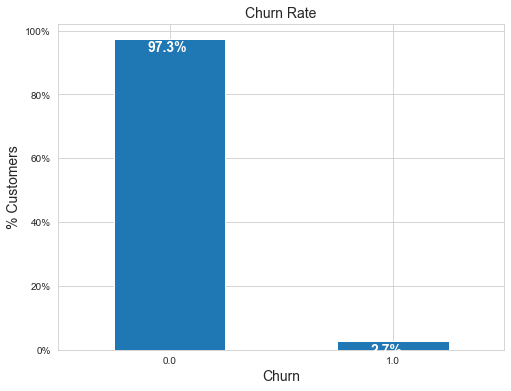

In [98]:
#Churn value
print('Churn value:')
cust_df['Churn'].value_counts()
print('-------------------------------------------------------------------------------')

ax = (hod_df['Churn'].value_counts()*100.0 /len(hod_df)).plot(kind='bar',stacked = True,rot = 0, figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

### <mark> Group 5 remarks: 
- Using the hold out data, we predict using our Random Forest Classifier model that 2.7% of customers will likely churn. 

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

When building a predictive model, it is essential that the success metrics we choose are aligned with the business goal agreed with the client. For a business goal focused on marketing, customer retention, cross-sell/up-sell, some handy measures are Lift and Gains.
Naturally metrics such as AUC and Brier Scores are arguably a better way to measure performance, but the value of Lift and Gains goes beyond simply measuring performance in statistical terms, they offer a performance measure in business terms.

**Propensity Scores**
A typical predictive model assigns a propensity score to the target outcome (in this case: churn) to each customer, based on the information we have about them. The propensity will be a number between 0 and 1. **This is an important feature of predictive models:** they tell you the propensity of an outcome (a number between 0 and 1). They do not tell you definitively what an outcome will be (either 0 or 1).

These customers can then be ranked by propensity to churn and divided into deciles. So, the 1st decile is the top 10% of customers with the highest propensity to churn.

**Lift**
We know which customers actually churned and which didn’t, so for each decile, we know the number of customers that actually churned. Lift is defined as the ratio of the success rate you get by the model strategy to the random strategy.

**Gains**
The term **Gains** means how much we have gained. In the example below, if we target the top 3 deciles (decile 9, 8, 7, because decile starts from 0), we would have gained/correctly identified 42.98% of the total churners. Gain is defined as the ratio of the cumulative number of churners up to that decile, divided by the total number of churners.

****
**Source(s):** 
- https://www.k2analytics.co.in/7-important-model-performance-measures/
- https://www.youtube.com/watch?v=eqxqnJkjqp8
- https://www.linkedin.com/pulse/model-evaluation-metrics-jassel-majevadia/
****

In [102]:
#define the dataframe to build the Rank Order Table;
#we will need the actual labels (0 = Non-Churn, 1 = Churn) in y_test, and
#the probability from the classification model for 1 = Churn (therefore slicing [:,1])
d = {"target": y_test, "predicted_probability": rfc1.predict_proba(X_test)[:,1]}
rot_df = pd.DataFrame(data = d)
rot_df.head(10)
len(rot_df)

,target,predicted_probability
36313,1,0.195312
36095,0,0.117188
8855,0,0.210938
22227,0,0.296875
5198,0,0.257812
38811,0,0.046875
1228,1,0.320312
39258,0,0.109375
7023,0,0.140625
24582,0,0.195312


14593

In [103]:
#grouping the dataframe into 10 deciles (i.e. 10% buckets) according to predicted probabilities
df['decile'] = pd.qcut(rot_df['predicted_probability'], 10, labels = False)

#define a function to generate the Rank Order Table
def rank_order(x, y, target):
    rank = x.groupby('decile').apply(lambda x: pd.Series([
        np.size(x[y]),
        np.sum(x[target]),
        np.size(x[target][x[target]==0]),
    ],
    index = (['customer_count','churner_count','non_churner_count'])
    )).reset_index()
    rank = rank.sort_values(by = 'decile', ascending = False)
    rank['churn_rate'] = round(rank['churner_count']/rank['customer_count'] * 100, 2)
    rank['cumulative_customers'] = np.cumsum(rank['customer_count'])
    rank['cumulative_churners'] = np.cumsum(rank['churner_count'])
    rank['cumulative_non_churners'] = np.cumsum(rank['non_churner_count'])
    rank['cumulative_customers_pct'] = round(rank['cumulative_customers']/np.sum(rank['customer_count']) * 100, 2)
    rank['cumulative_churners_pct'] = round(rank['cumulative_churners']/np.sum(rank['churner_count']) * 100, 2)
    rank['cumulative_non_churners_pct'] = round(rank['cumulative_non_churners']/np.sum(rank['non_churner_count']) * 100, 2)
    rank['KS'] = round(rank['cumulative_churners_pct'] - rank['cumulative_non_churners_pct'], 2)
    rank['lift'] = round(rank['cumulative_churners_pct'] / rank['cumulative_customers_pct'], 2)
    rank
    return(rank)
                                                
gains_table = rank_order(df,'predicted_probability','target')
gains_table

,decile,customer_count,churner_count,non_churner_count,churn_rate,cumulative_customers,cumulative_churners,cumulative_non_churners,cumulative_customers_pct,cumulative_churners_pct,cumulative_non_churners_pct,KS,lift
9,9,1394,705,689,50.57,1394,705,689,9.55,16.95,6.60,10.35,1.77
8,8,1420,574,846,40.42,2814,1279,1535,19.28,30.75,14.71,16.04,1.59
7,7,1225,450,775,36.73,4039,1729,2310,27.68,41.56,22.14,19.42,1.50
6,6,1717,536,1181,31.22,5756,2265,3491,39.44,54.45,33.46,20.99,1.38
5,5,1168,369,799,31.59,6924,2634,4290,47.45,63.32,41.12,22.20,1.33
4,4,1524,417,1107,27.36,8448,3051,5397,57.89,73.34,51.73,21.61,1.27
3,3,1475,364,1111,24.68,9923,3415,6508,68.00,82.09,62.38,19.71,1.21
2,2,1624,326,1298,20.07,11547,3741,7806,79.13,89.93,74.82,15.11,1.14
1,1,1461,238,1223,16.29,13008,3979,9029,89.14,95.65,86.54,9.11,1.07
0,0,1585,181,1404,11.42,14593,4160,10433,100.00,100.00,100.00,0.00,1.00


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

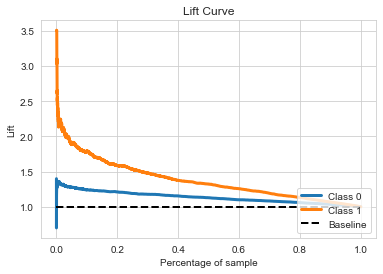

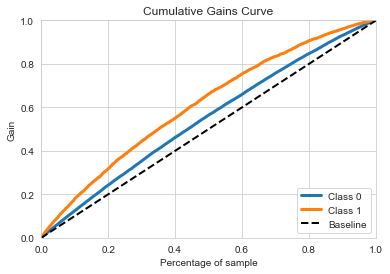

In [104]:
import scikitplot as skplt
predicted_probabilities = rfc1.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?

### <mark> Group 5 remarks: 
- Based on the Rank Order Table, the % actual churn captured by targeting the top 20% of customers is 30.65%, and the corresponding lift is 1.63x
- This implies that the model potentially produces 1.63x better results than random selection when selecting the top 20% of churners